# Follow-Up on Periodicity of Quiescent Sources, b/c Often No Decent Signal
- compare to source #55
- any way to distinguish among quiescent sources?

- make sure features/properties can separate out these two types of sources


In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
summ = pd.read_csv('summtab.csv')

In [2]:
cross2 = Table.read('part2files.csv')
cross2 = join(cross2,full,keys='src_n')
phase = pd.read_csv('phasetab.csv')

In [3]:
summ[summ['src_n']==55]

src_n     ra_deg  dec_deg  spin period  perr  est. period       sep name  \
50     55  15.697975 -72.0808        522.5  0.84          0.0  1.082553  NaN   

       mean I   stdev I  ...  V-I transition  Type II amp  note    I skew  \
50  16.143481  0.168627  ...             NaN          NaN   NaN -2.206142   

    I kurtosis   V skew  V kurtosis  best auto det pd Part  I IQR  
50    3.780608 -1.95526    3.337143        129.599095  1.0  0.054  

[1 rows x 45 columns]

## Source  #55

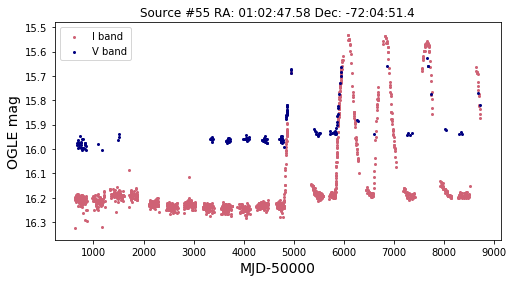

In [4]:
iband,vband = o.getIV(55,cross,stack=True,plot=True)

In [5]:
flatten,trend = o.splinedetrend(iband,window=300,btol=50,retspline=True)

seeing it close up, maybe this source was never quiescent
- will also compare sources that have slight/gradual variability like this

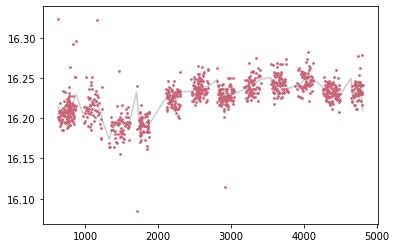

In [6]:
#isolate beginning of LC
plt.scatter(iband['MJD-50000'][:1000],iband['I mag'][:1000],color=pink,s=3)
plt.plot(iband['MJD-50000'][:1000],trend[:1000],color='grey',alpha=0.4)

<Quantity 127.70071465>

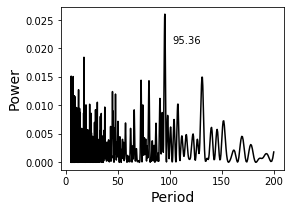

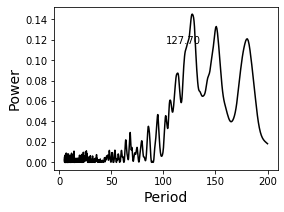

In [7]:
st = 0; end = 1000
o.periodogram(iband[st:end],maxp=200,det=True)
st = 1000; end = -1
o.periodogram(iband[st:end],maxp=200,det=True)

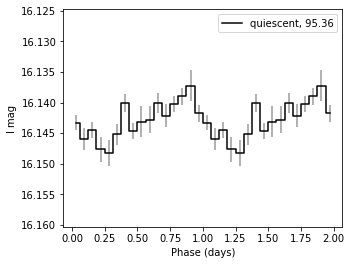

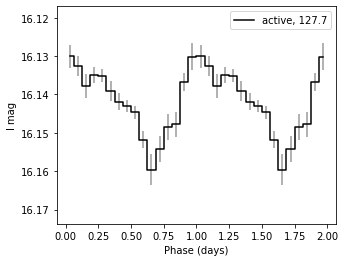

In [8]:
#fold each part with respective best period
st = 0; end = 1000
plt.figure(figsize=(5,4))
o.phasestep(iband[st:end],95.36,16,divide=True,det=True,label='quiescent, 95.36')
plt.legend()
st = 1000; end = -1
plt.figure(figsize=(5,4))
o.phasestep(iband[st:end],127.7,16,divide=True,det=True,label='active, 127.7')
plt.legend()

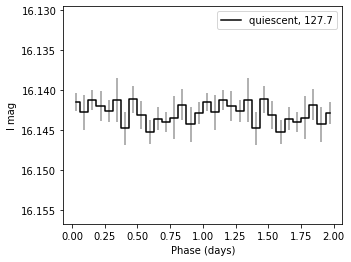

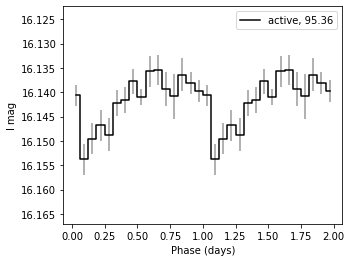

In [9]:
#fold each with the others' best period
st = 0; end = 1000
plt.figure(figsize=(5,4))
o.phasestep(iband[st:end],127.7,16,divide=True,det=True,label='quiescent, 127.7')
plt.legend()
st = 1000; end = -1
plt.figure(figsize=(5,4))
o.phasestep(iband[st:end],95.36,16,divide=True,det=True,label='active, 95.36')
plt.legend()

127.7 signal only during flares, whereas 95.36 in the whole LC
- look for aliases 

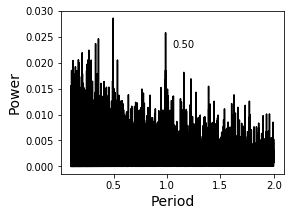

In [10]:
reload(o)
freq,power,bp = o.periodogram(iband[:1000],minp=0.1,maxp=2,det=True,more=True)
pf = o.findpeaks(freq,power,pkorder=True,sigma=50)

In [11]:
pf[:5]

period     power     ind
0  0.496706  0.028626   63158
1  0.986927  0.025805   21421
2  0.358522  0.024651   95544
3  0.331561  0.023704  105010
4  0.268238  0.022430  134726

In [12]:
o.aliasarr(pf['period'])

array([[ 0.98691008, 75.4920237 ,  0.55889933,  0.49602288,  0.36656483,
         0.25986615],
       [ 0.33186609,  0.49671018,  0.26390579,  0.24900175,  0.21150456,
         0.17099469]])

In [13]:
o.findbeat(75.49,95.36)

362.2912128837443

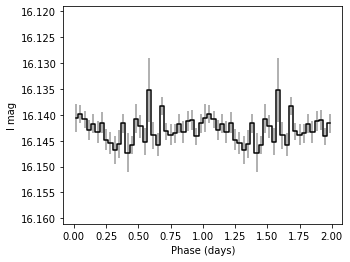

In [14]:
st = 0; end = 1000
plt.figure(figsize=(5,4))
o.phasestep(iband[st:end],75.4920237,30,divide=True,det=True)

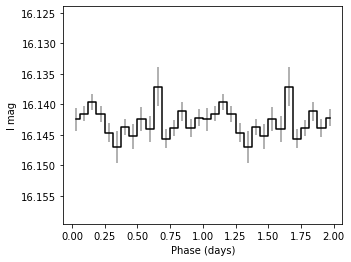

In [15]:
st = 0; end = 1000
plt.figure(figsize=(5,4))
o.phasestep(iband[st:end],75.3,16,divide=True,det=True)

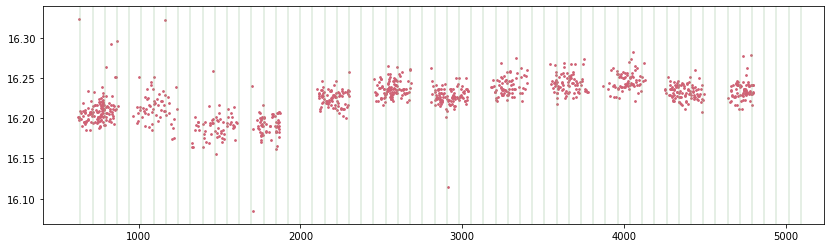

In [16]:
plt.figure(figsize=(14,4))
plt.scatter(iband['MJD-50000'][:1000],iband['I mag'][:1000],color=pink,s=3)
# plt.axvline(780)
for i in range(60):
    plt.axvline(640+75.5*i,alpha=0.3,color='darkseagreen')


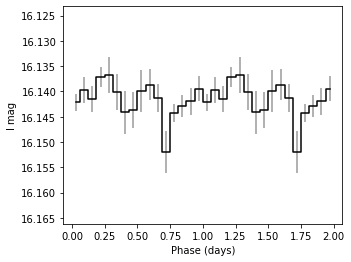

In [17]:
st = 1000; end = -1
plt.figure(figsize=(5,4))
o.phasestep(iband[st:end],75.3,16,divide=True,det=True)

# List of Quiescent Sources: 
- 8,42,61,68,69,71,76,77,78,79,81,93,98,100,105,111,114,129,138,139,141

In [18]:
qnums = [8,42,61,68,69,71,76,77,78,79,81,93,98,100,105,111,114,129,138,139,141]
# for q in qnums:
#     print(float(summ[summ['src_n']==q]['spin period']))

In [19]:
mlist2 = ['OII I','OIII I','OIV I']
mlist1 = ['OII I','OIII I']

established period: nan


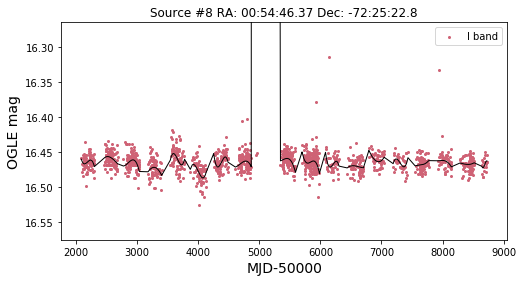

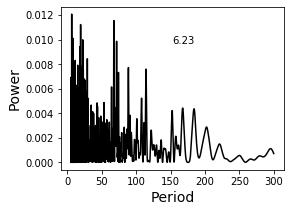

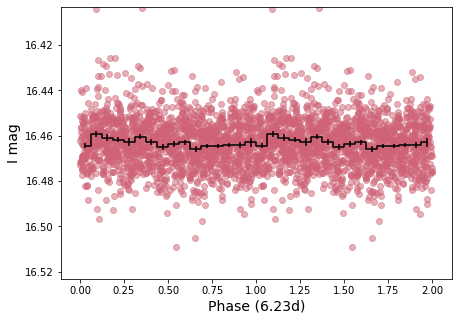

In [166]:
reload(o)
iband,bp = o.splinesearch(8,cross2,full,calib=True,both=False,minp=5,maxp=300,det=True,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)

In [21]:
summ[summ['src_n']==42]

src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
38     42  11.847077 -73.207756        263.0   0.5        49.06  3.543154   

   name    mean I   stdev I  ...  V-I transition  Type II amp  note    I skew  \
38  NaN  16.02174  0.008349  ...             NaN          NaN   NaN -0.320838   

    I kurtosis    V skew  V kurtosis  best auto det pd Part  I IQR  
38    0.356229  2.994404   11.859674         51.732467  2.0   0.01  

[1 rows x 45 columns]

established period: 49.06


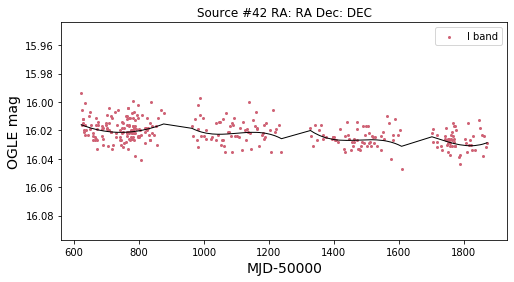

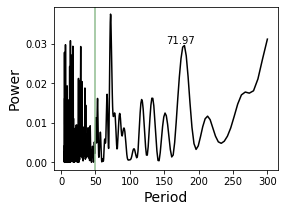

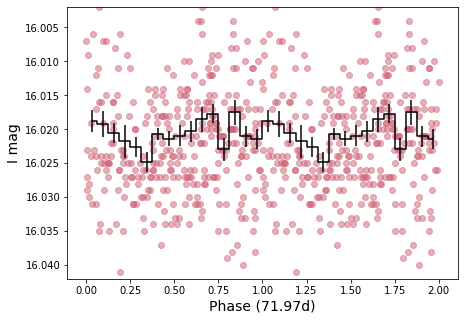

In [167]:
iband,bp = o.splinesearch(42,cross2,full,both=False,minp=5,maxp=300,det=False,window=200,btol=50,phase=True,color=pink,ylim=.02,close=False,mlist=mlist2)

(16.05, 15.99)

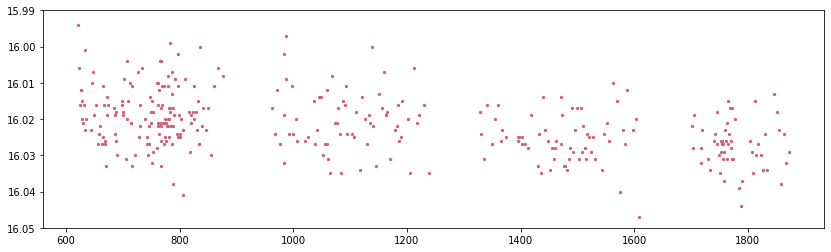

In [113]:
plt.figure(figsize=(14,4))
plt.scatter(iband['MJD-50000'],iband['I mag'],color=pink,s=5)
plt.ylim(16.05,15.99)

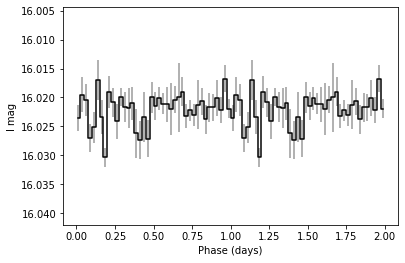

In [23]:
#fold with established period
o.phasestep(iband,49.06,pbins=40,divide=True)

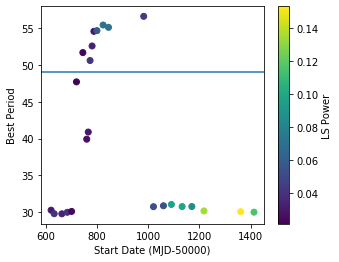

In [24]:
reload(o)
roll = o.rollpd(iband,npoint=100,nroll=10,det=False,minp=30,maxp=60,plot=False,plotbest=True)
plt.axhline(49.06)

(100, 600)

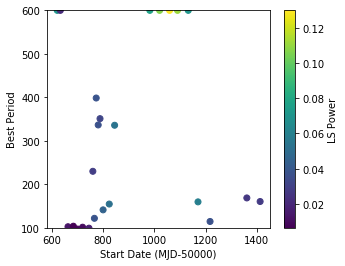

In [25]:
roll = o.rollpd(iband,npoint=100,nroll=10,det=False,minp=100,maxp=600,plot=False,plotbest=True)
plt.ylim(100,600)

In [586]:
row = summ[summ['src_n']==61]
row['aperiodic quiescence'] = 'NO'
summ[summ['src_n']==61] = row

established period: 91.5


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
56     61  12.373937 -73.18304        894.0  0.57         91.5  0.278197  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
56  15.943386  0.022006  ...          NaN   NaN -0.074736   -0.358669   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
56 -0.109414   -0.139366         90.868982   2.0  0.032                    NO  

[1 rows x 46 columns]

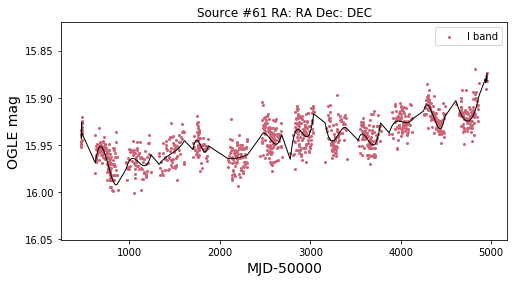

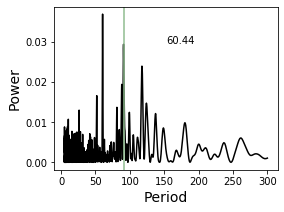

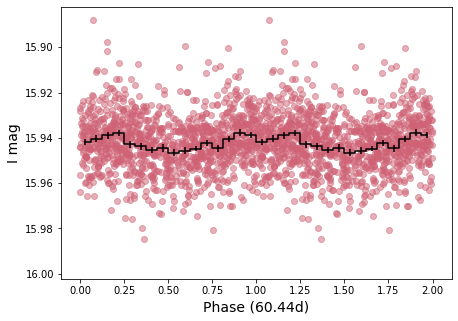

In [587]:
iband,bp = o.splinesearch(61,cross2,full,both=False,minp=5,maxp=300,det=True,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==61]

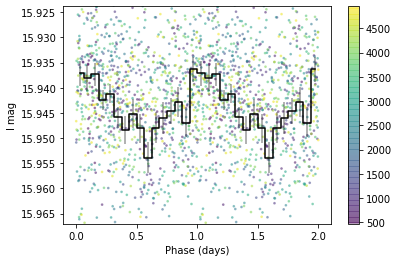

In [27]:
pd = 91.5
o.phasestep(iband,pd,pbins=16,divide=True,det=False)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],c=iband['MJD-50000'],s=3,alpha=0.4)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],c=iband['MJD-50000'],s=3,alpha=0.4)
plt.colorbar()

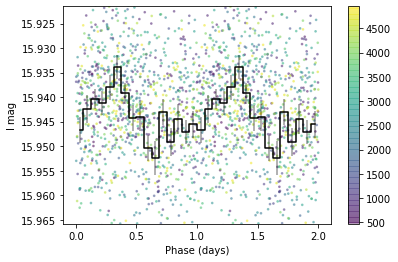

In [28]:
#best period from auto
pd = 90.868982
o.phasestep(iband,pd,pbins=16,divide=True,det=False)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I detrend'],c=iband['MJD-50000'],s=3,alpha=0.4)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I detrend'],c=iband['MJD-50000'],s=3,alpha=0.4)
plt.colorbar()

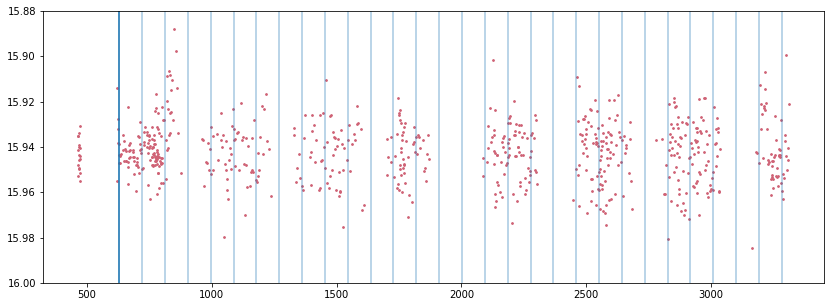

In [29]:
plt.figure(figsize=(14,5))
plt.scatter(iband['MJD-50000'][:700],iband['I detrend'][:700],color=pink,s=3)
plt.ylim(16,15.88)
plt.axvline(630)
for i in range(30):
    plt.axvline(630+91.5*i,alpha=0.4)

established period: nan


src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
62     68  10.816116 -73.410904          0.0  1.52          0.0  2.820567   

   name     mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
62  NaN  16.830576  0.013991  ...          NaN   NaN  0.236245    2.449767   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
62  0.524017    0.013971          5.815551   2.0  0.017                   YES  

[1 rows x 46 columns]

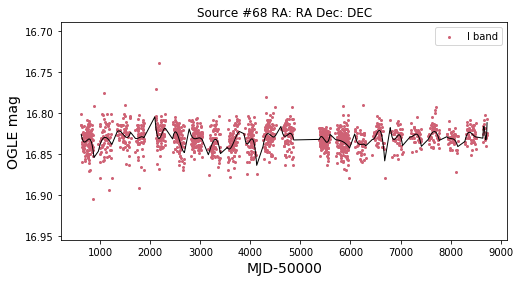

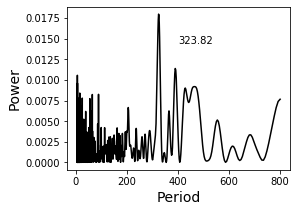

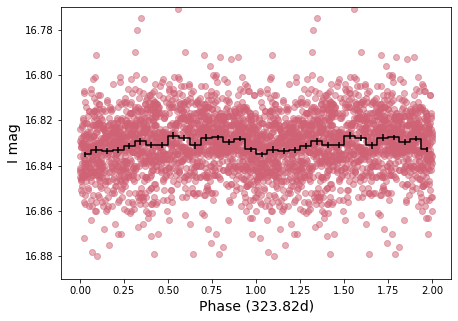

In [407]:
reload(o)
iband,bp = o.splinesearch(68,cross2,full,both=False,minp=5,calib=True,maxp=800,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==68]

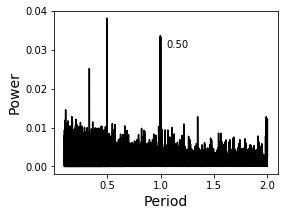

In [34]:
freq,power,bp = o.periodogram(iband,minp=0.1,maxp=2,more=True)

In [38]:
pf = o.findpeaks(freq,power,pkorder=True,sigma=50)

In [39]:
pf

period     power     ind
0   0.499403  0.038163  121782
1   0.997618  0.033613   40723
2   1.000351  0.033344   40501
3   0.996906  0.032911   40781
4   0.332763  0.025201  203064
5   0.499213  0.023602  121844
6   0.999598  0.021353   40562
7   0.498672  0.016513  122020
8   0.498549  0.016464  122060
9   0.111050  0.014547  689399
10  0.169561  0.012793  437523
11  1.346863  0.012788   19654
12  1.989398  0.012776     216
13  0.332681  0.012515  203124
14  1.999655  0.012312       7
15  0.206909  0.012111  351232

In [40]:
o.aliasarr(pf['period'])

array([[9.97615947e-01, 4.18757023e+02, 2.85118844e+03, 3.22211756e+02,
        4.98717655e-01, 9.96855294e-01, 2.48874690e+03, 9.94702326e-01,
        9.94214312e-01, 1.24923195e-01, 2.04181795e-01, 3.88297919e+00,
        2.01071603e+00, 4.98533620e-01, 2.00034549e+00, 2.60888926e-01],
       [3.33068017e-01, 4.99403707e-01, 5.00087698e-01, 4.99225315e-01,
        2.49679002e-01, 3.32983187e-01, 4.99899568e-01, 3.32742617e-01,
        3.32687990e-01, 9.99508386e-02, 1.44978041e-01, 5.73899361e-01,
        6.65484442e-01, 2.49632867e-01, 6.66628288e-01, 1.71436932e-01]])

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
63     69  11.250834 -73.71298          0.0  1.72          0.0  1.649453  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
63  15.551154  0.007666  ...          NaN   NaN -0.431217    6.059095   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
63  0.472576    0.732675         10.563405   2.0  0.009                   YES  

[1 rows x 46 columns]

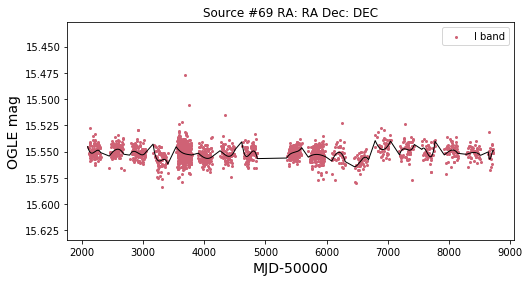

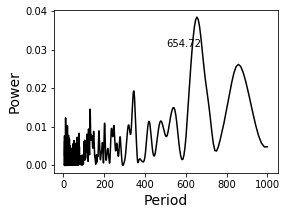

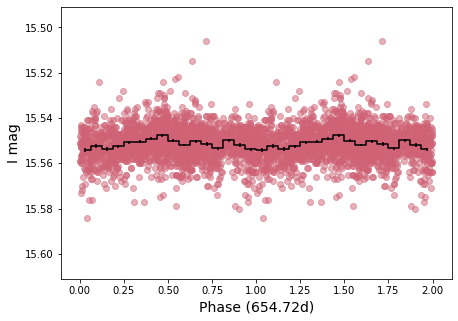

In [399]:
iband,bp = o.splinesearch(69,cross2,full,both=False,minp=5,calib=True,maxp=1000,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==69]

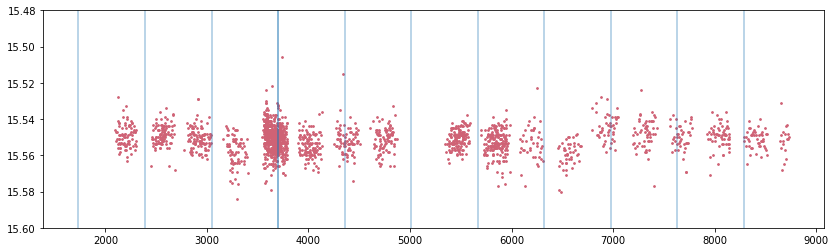

In [406]:
plt.figure(figsize=(14,4))
plt.scatter(iband['MJD-50000'],iband['I mag'],color=pink,s=3)
plt.ylim(15.6,15.48)
plt.axvline(3700,alpha=0.4)
for i in range(-3,8):
    plt.axvline(3700+655*i,alpha=0.4)

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
64     71  12.078058 -73.34998          0.0  0.55          0.0  0.043111  NaN   

       mean I   stdev I  ...  V-I transition  Type II amp  note    I skew  \
64  16.681209  0.014018  ...             NaN          NaN   NaN  1.186657   

    I kurtosis    V skew  V kurtosis  best auto det pd Part  I IQR  
64   10.044522  1.474998     5.75056         26.487428  2.0  0.016  

[1 rows x 45 columns]

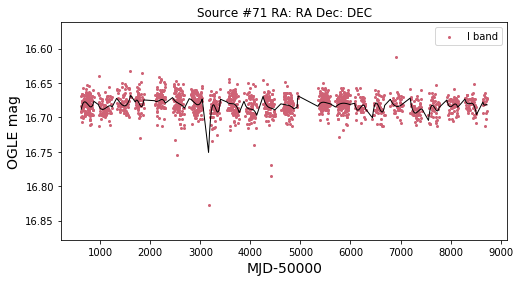

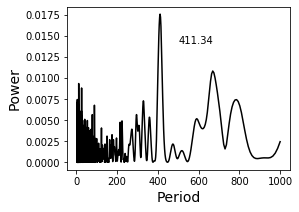

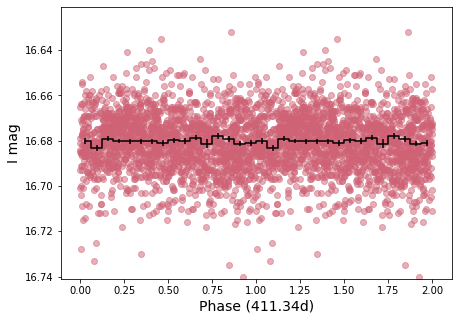

In [172]:
iband,bp = o.splinesearch(71,cross2,full,both=False,minp=5,calib=True,maxp=1000,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==71]

established period: nan


src_n   ra_deg  dec_deg  spin period  perr  est. period       sep name  \
68     76  12.3425  -73.335          0.0   3.4          0.0  1.577734  NaN   

       mean I   stdev I  ...  V-I transition  Type II amp  note    I skew  \
68  16.929685  0.014269  ...             NaN          NaN   NaN -0.120511   

    I kurtosis    V skew  V kurtosis  best auto det pd Part  I IQR  
68    5.124422  1.368177    9.084296          3.414415  2.0  0.017  

[1 rows x 45 columns]

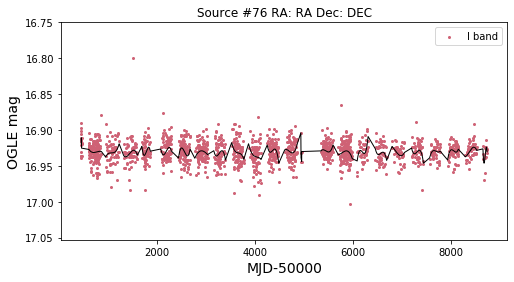

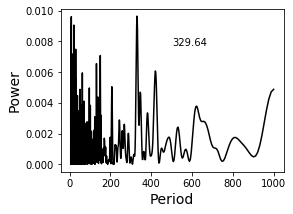

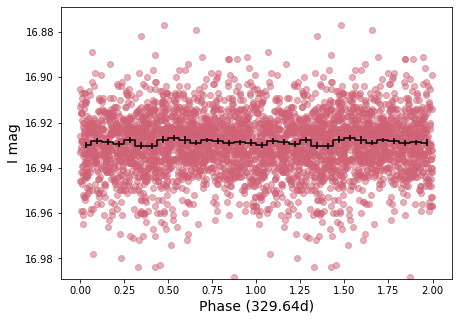

In [173]:
iband,bp = o.splinesearch(76,cross2,full,both=False,minp=5,calib=True,maxp=1000,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==76]

established period: nan


src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
69     77  12.377575 -73.519264          0.0  0.57          0.0  1.289047   

   name     mean I   stdev I  ...  V-I transition  Type II amp  note  \
69  NaN  19.236647  0.646089  ...             NaN          NaN   NaN   

      I skew  I kurtosis    V skew  V kurtosis  best auto det pd Part    I IQR  
69  1.505199    6.201181  3.030992   12.404027          3.188164  2.0  0.34475  

[1 rows x 45 columns]

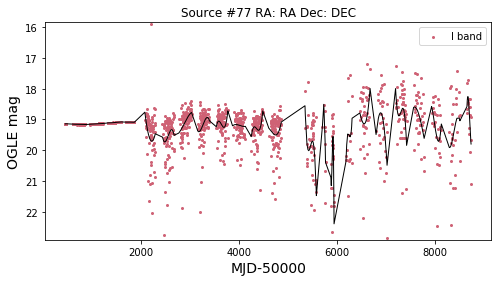

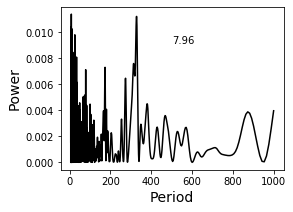

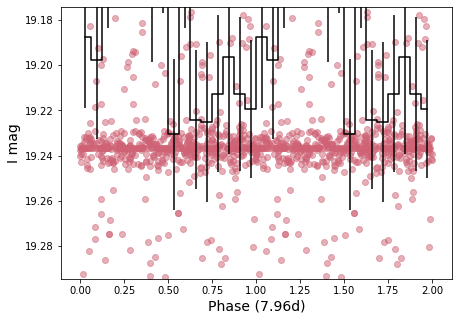

In [175]:
iband,bp = o.splinesearch(77,cross2,full,both=False,minp=5,calib=True,maxp=1000,det=True,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==77]

empty file for OII I
established period: nan
7.741456882951685


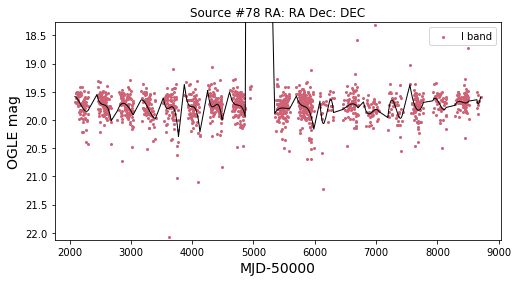

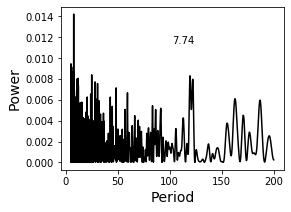

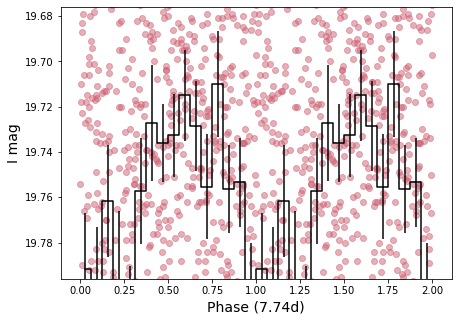

In [391]:
iband,bp = o.splinesearch(78,cross2,full,both=False,minp=5,calib=True,maxp=200,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==78]
print(bp)

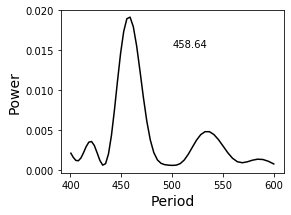

In [395]:
bp = o.periodogram(iband,minp=400,maxp=600)

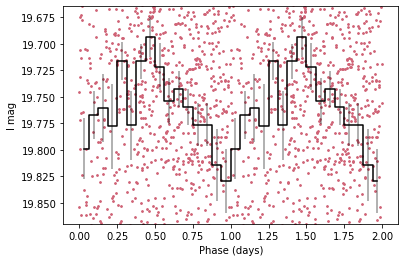

In [398]:
o.phasestep(iband,bp,16,divide=True)
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I mag'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I mag'],color=pink,s=3)

array([[3.66730542e+02, 9.94568750e-01, 4.97959605e-01, 3.32423640e-01,
        1.00005360e+00, 2.49317881e-01, 1.88256298e+04, 4.98634853e-01,
        1.81418842e+03, 1.82598442e+02, 4.51851305e+02, 3.33320930e-01,
        9.95077126e-01, 3.33034142e-01, 2.50003440e-01, 1.51433386e-01],
       [4.99319229e-01, 3.32727668e-01, 2.49488858e-01, 1.99672152e-01,
        3.33339289e-01, 1.66363227e-01, 5.00013280e-01, 2.49658247e-01,
        4.99862235e-01, 4.98634614e-01, 4.99447332e-01, 1.99995535e-01,
        3.32784546e-01, 1.99892252e-01, 1.66668196e-01, 1.16230906e-01]])

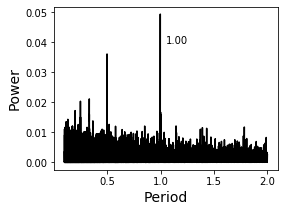

In [64]:
f,p,bp = o.periodogram(iband,minp=0.1,maxp=2,more=True)
pf = o.findpeaks(f,p,sigma=50,pkorder=True)
o.aliasarr(pf['period'])

(5, 25)

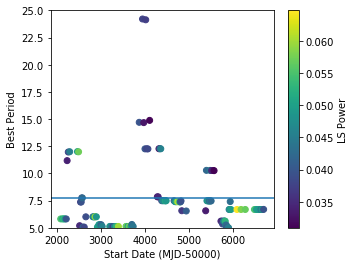

In [72]:
#rolling search
roll = o.rollpd(iband,npoint=300,nroll=10,minp=5,maxp=25,plot=False,plotbest=True)
plt.axhline(7.741456882951685)
plt.ylim(5,25)

In [78]:
len(iband)

1473

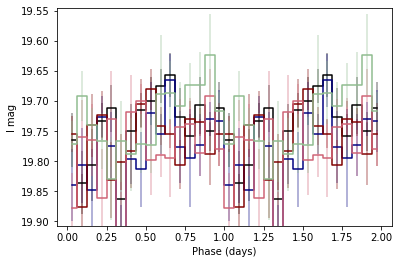

In [84]:
o.phasestep(iband[:300],7.74,16,divide=True)
o.phasestep(iband[300:600],7.74,16,divide=True,color='navy')
o.phasestep(iband[600:900],7.74,16,divide=True,color='maroon')
o.phasestep(iband[900:1200],7.74,16,divide=True,color=pink)
o.phasestep(iband[1200:],7.74,16,divide=True,color='darkseagreen')

established period: nan


src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
71     79  12.518333 -73.240555          0.0  1.59          0.0  0.813089   

   name     mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
71  NaN  15.697129  0.010549  ...          NaN   NaN -2.423485    19.02644   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
71  3.351175    16.04699         14.419814   2.0  0.011                   YES  

[1 rows x 46 columns]

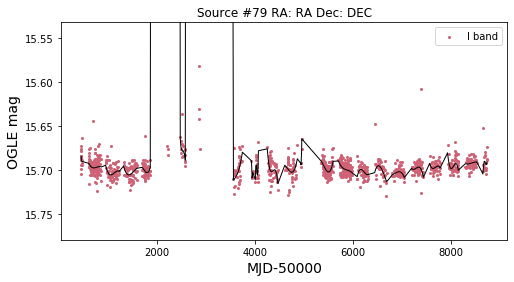

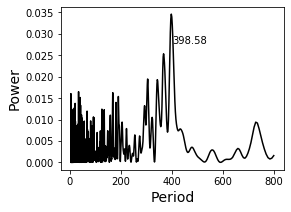

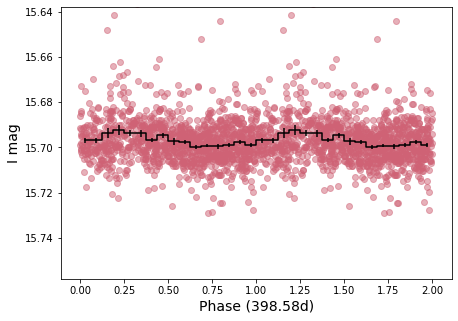

In [388]:
iband,bp = o.splinesearch(79,cross2,full,both=False,minp=5,calib=True,maxp=800,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==79]

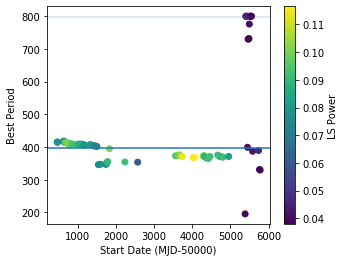

In [389]:
roll = o.rollpd(iband,npoint=500,nroll=10,maxp=800,plotbest=True)
plt.axhline(398.58)
plt.axhline(398.58*2,alpha=0.2)

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
73     81  12.647917 -73.23361          0.0  1.14          0.0  1.496582  NaN   

       mean I   stdev I  ...  Type II amp  note   I skew  I kurtosis  \
73  15.955679  0.028396  ...          NaN   NaN  0.59413    0.625988   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
73  0.591717    0.239135          2.169828   2.0  0.038                   YES  

[1 rows x 46 columns]

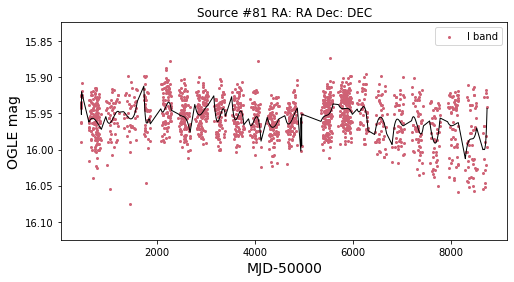

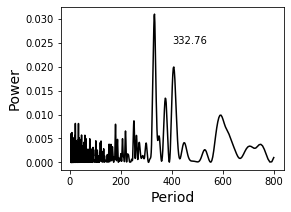

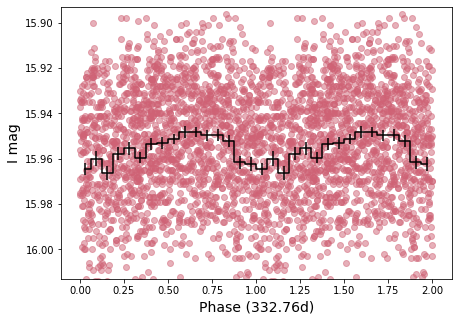

In [379]:
iband,bp = o.splinesearch(81,cross2,full,both=False,minp=5,calib=True,maxp=800,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==81]

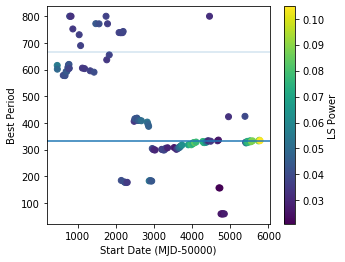

In [387]:
roll = o.rollpd(iband,npoint=500,nroll=10,maxp=800,plotbest=True)
plt.axhline(333)
plt.axhline(333*2,alpha=0.2)

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
79     93  13.032346 -72.35717          0.0  2.02          0.0  1.708929  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
79  15.323901  0.006556  ...          NaN   NaN  0.056264    2.154625   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
79 -0.319475   -1.735904          2.498056   2.0  0.008                   YES  

[1 rows x 46 columns]

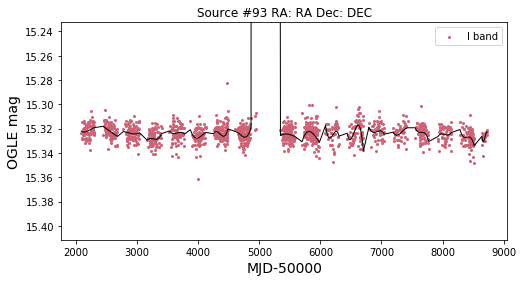

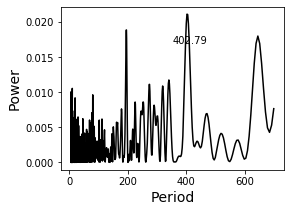

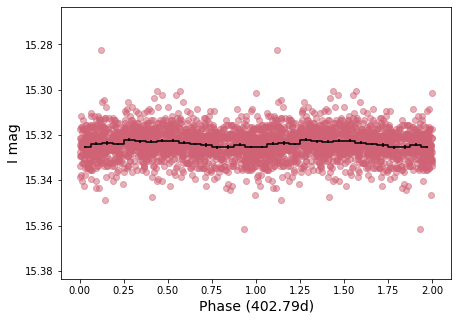

In [377]:
iband,bp = o.splinesearch(93,cross2,full,both=False,minp=5,calib=True,maxp=700,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==93]

established period: nan


src_n     ra_deg  dec_deg  spin period  perr  est. period       sep name  \
83     98  13.247778 -72.9006          0.0  2.08          0.0  0.727892  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
83  17.214864  0.019528  ...          NaN   NaN -0.171653    3.229193   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
83  4.162627   22.275098          2.699109   2.0  0.023                   YES  

[1 rows x 46 columns]

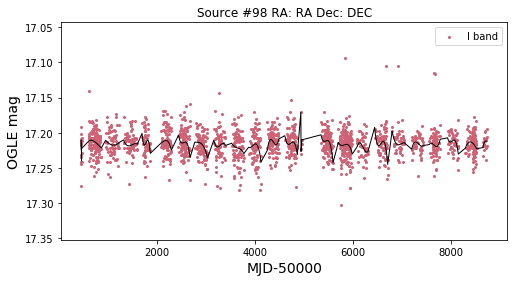

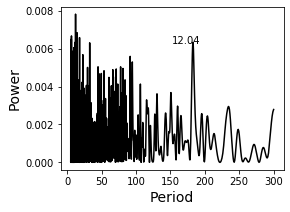

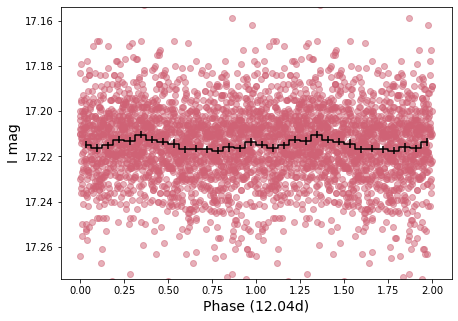

In [375]:
iband,bp = o.splinesearch(98,cross2,full,both=False,minp=5,calib=True,maxp=300,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==98]

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
84    100  13.327146 -72.27155          0.0  1.59          0.0  2.382539  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
84  16.789079  0.012572  ...          NaN   NaN  0.332249    6.215907   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
84  0.142054   -0.392985         11.782812   2.0  0.015                   YES  

[1 rows x 46 columns]

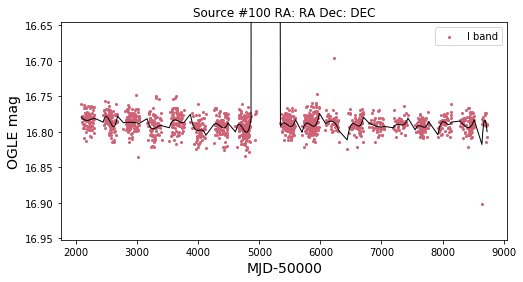

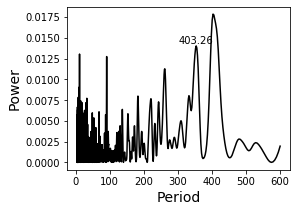

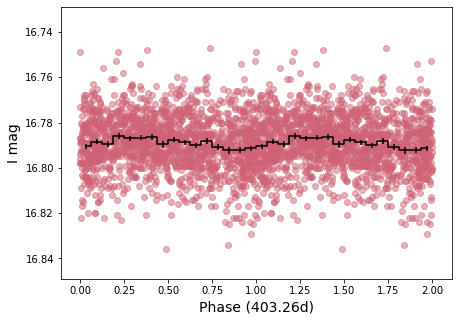

In [373]:
iband,bp = o.splinesearch(100,cross2,full,both=False,minp=5,calib=True,maxp=600,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==100]

established period: nan


src_n    ra_deg   dec_deg  spin period  perr  est. period       sep name  \
87    105  13.46875 -72.44417          0.0   0.9          0.0  1.493102  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
87  13.328054  0.007234  ...          NaN   NaN  4.497262   65.382959   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
87  0.364966   -1.548967         35.721852   2.0  0.008                   YES  

[1 rows x 46 columns]

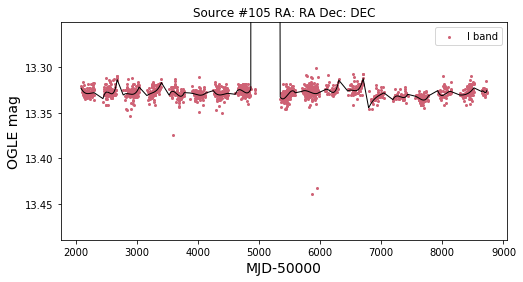

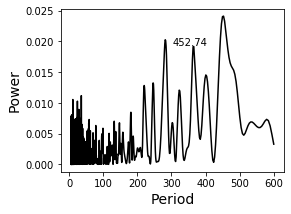

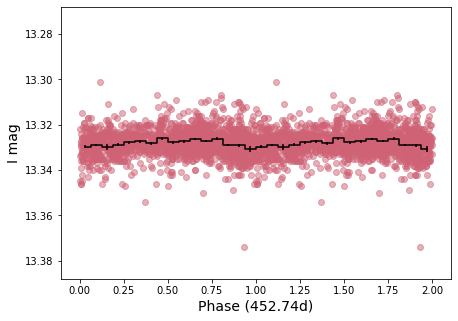

In [358]:
iband,bp = o.splinesearch(105,cross2,full,both=False,minp=5,calib=True,maxp=600,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==105]

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
90    111  13.782148 -72.37787          0.0  0.89          0.0  0.773307  NaN   

       mean I   stdev I  ...  V-I transition  Type II amp  note    I skew  \
90  14.574343  0.016476  ...             NaN          NaN   NaN -2.982028   

    I kurtosis  V skew  V kurtosis  best auto det pd Part  I IQR  
90    18.67819 -0.6005    1.413334          2.045777  2.0  0.015  

[1 rows x 45 columns]

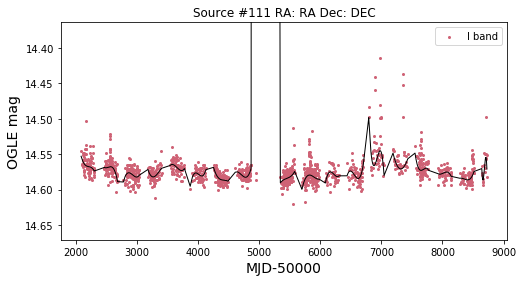

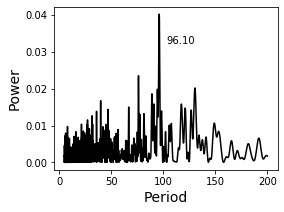

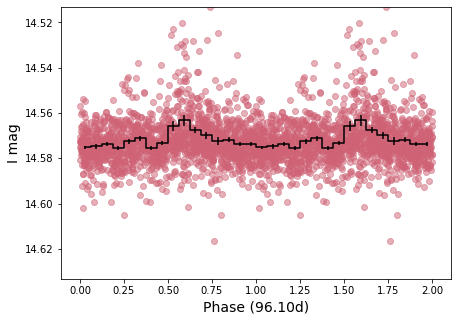

In [184]:
#same answer with or without detrending
iband,bp = o.splinesearch(111,cross2,full,both=False,minp=5,calib=False,maxp=200,det=True,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==111]

- arguably in gradual variability
- 2.05 day best period sinusoidal but doesnt' explain optical peaks

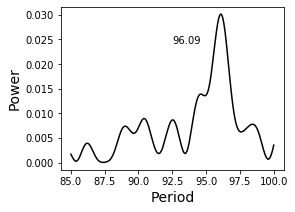

In [125]:
bp = o.periodogram(iband,minp=85,maxp=100,samples=50)

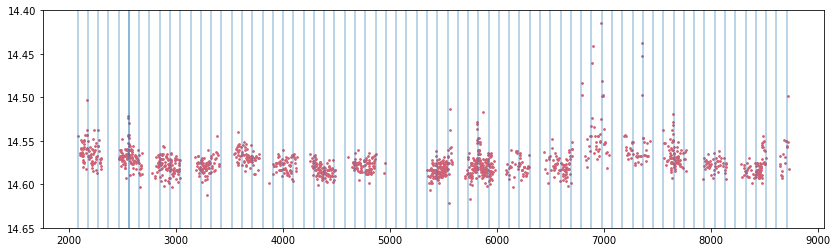

In [109]:
#looks good with lines
plt.figure(figsize=(14,4))
plt.scatter(iband['MJD-50000'],iband['I mag'],color=pink,s=3)
plt.ylim(14.65,14.4)
plt.axvline(2560,alpha=0.4)
for i in range(-5,65):
    plt.axvline(2560+96.1*i,alpha=0.4)

In [584]:
row = summ[summ['src_n']==111]
row['best period'] = 96.1
row['aperiodic quiescence'] = 'NO'
summ[summ['src_n']==111] = row

In [130]:
summ[summ['src_n']==111]['best period']

90    96.1
Name: best period, dtype: float64

In [138]:
#replace in phase table using this period value
reload(o)
pdict = o.combine(111,cross2,full,iband=iband,pbins=16,det=False,pd=96.1,testbins=False,close=True)
row = phase[phase['src_n']==111]
#loop through keys in pdict and add quantities to df
for d in list(pdict.keys()):
    row[d] = pdict[d]
phase[phase['src_n']==111] = row

In [ ]:
phase.to_csv('phasetab.csv',index=False)

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
91    114  14.022837 -72.00308          0.0  1.97          0.0  1.127127  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
91  16.892123  0.029295  ...          NaN   NaN  1.822849    3.030195   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
91  1.091926    0.161523           2.95835   2.0  0.018                   YES  

[1 rows x 46 columns]

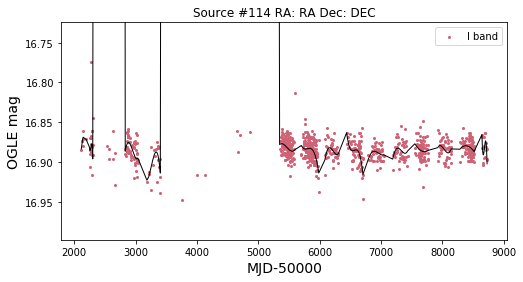

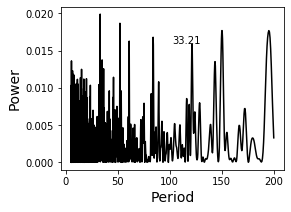

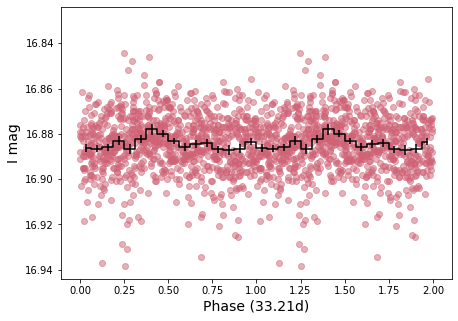

In [356]:
iband,bp = o.splinesearch(114,cross2,full,both=False,minp=5,calib=True,maxp=200,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==114]

established period: nan


src_n    ra_deg   dec_deg  spin period  perr  est. period  sep name  \
101    129  15.89009 -72.07152          0.0  1.65          0.0  0.0  NaN   

        mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
101  19.180064  0.088613  ...          NaN   NaN  0.872273    8.284427   

       V skew  V kurtosis  best auto det pd  Part    I IQR  \
101  0.389713    1.199631          8.612014   2.0  0.09325   

     aperiodic quiescence  
101                   YES  

[1 rows x 46 columns]

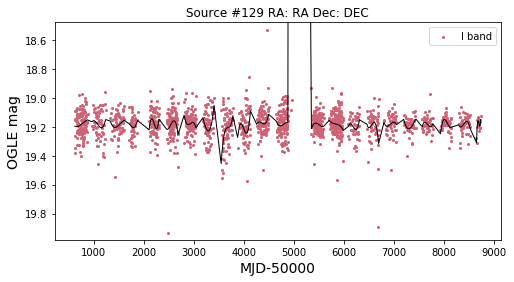

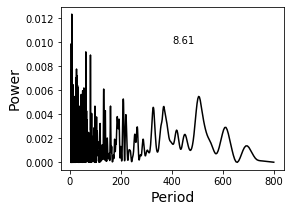

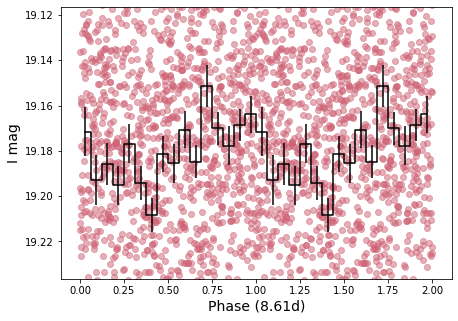

In [354]:
iband,bp = o.splinesearch(129,cross2,full,both=False,minp=5,calib=True,maxp=800,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==129]

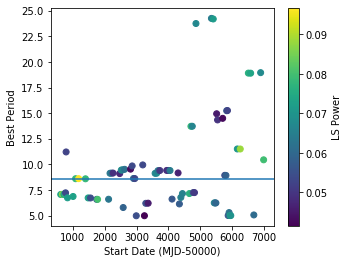

In [143]:
#rolling search
roll = o.rollpd(iband,npoint=200,nroll=20,minp=5,maxp=25,plot=False,plotbest=True)
plt.axhline(8.61)

established period: nan


src_n    ra_deg   dec_deg  spin period  perr  est. period       sep name  \
105    138  17.08409 -72.22975          0.0  0.71          0.0  2.451325  NaN   

        mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
105  14.684086  0.009529  ...          NaN   NaN  2.834886   29.894428   

       V skew  V kurtosis  best auto det pd  Part    I IQR  \
105 -7.292278   71.456149          2.140374   2.0  0.00975   

     aperiodic quiescence  
105                   YES  

[1 rows x 46 columns]

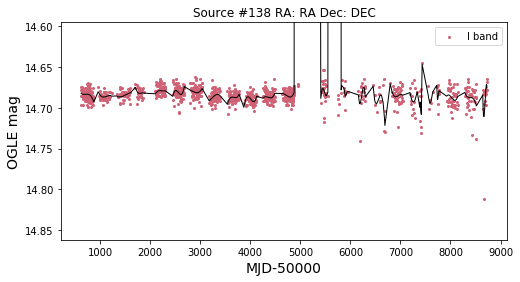

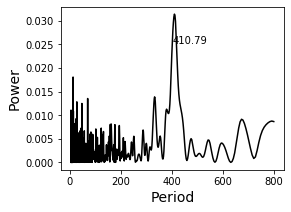

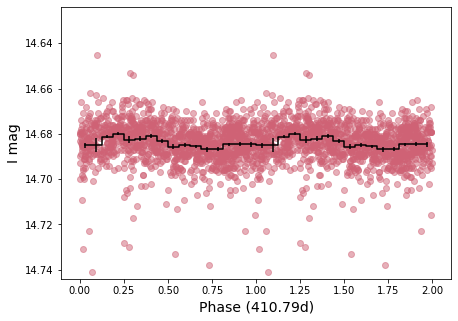

In [353]:
iband,bp = o.splinesearch(138,cross2,full,both=False,minp=5,calib=True,maxp=800,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==138]

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep  \
106    139  18.764706 -73.47206          0.0  1.03          0.0  1.804274   

    name     mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
106  NaN  16.643524  0.019152  ...          NaN   NaN  0.107101   -0.592761   

       V skew  V kurtosis  best auto det pd  Part I IQR  aperiodic quiescence  
106  0.388651   -0.070643         84.159974   2.0  0.03                   YES  

[1 rows x 46 columns]

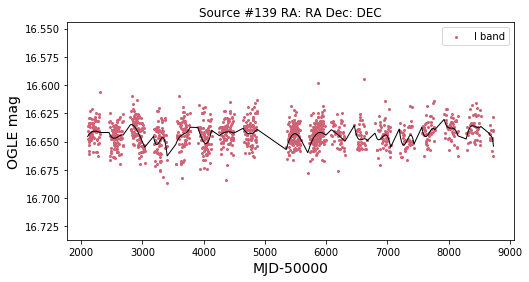

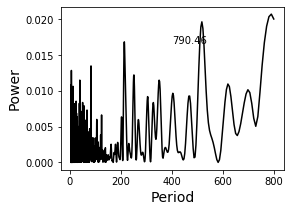

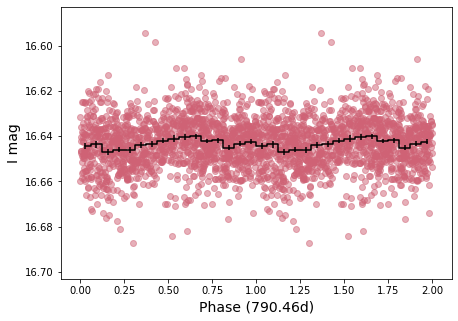

In [352]:
iband,bp = o.splinesearch(139,cross2,full,both=False,minp=5,calib=True,maxp=800,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==139]

established period: nan


src_n    ra_deg   dec_deg  spin period  perr  est. period       sep name  \
107    141  19.91226 -73.50316          0.0  0.72          0.0  0.175075  NaN   

        mean I   stdev I  ...  V-I transition  Type II amp  note    I skew  \
107  15.619686  0.016848  ...             NaN          NaN   NaN  0.271742   

     I kurtosis    V skew  V kurtosis  best auto det pd Part  I IQR  
107   -0.128521  0.279669   -0.494353          5.183714  2.0  0.024  

[1 rows x 45 columns]

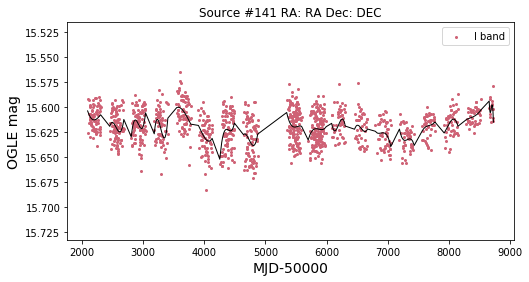

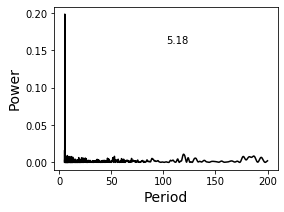

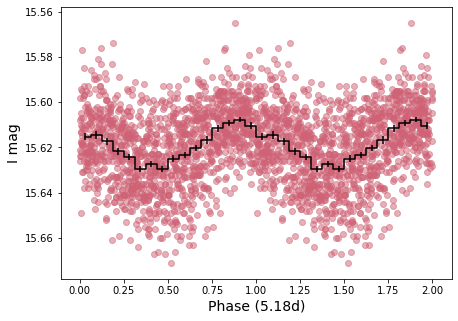

In [189]:
iband,bp = o.splinesearch(141,cross2,full,both=False,minp=5,calib=True,maxp=200,det=False,window=200,btol=50,phase=True,color=pink,ylim=.06,close=False,mlist=mlist2)
summ[summ['src_n']==141]

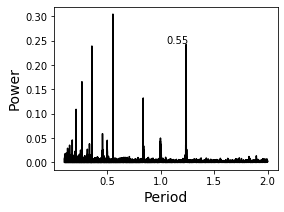

In [149]:
freq,power,bp = o.periodogram(iband,minp=0.1,maxp=2,more=True)
pf = o.findpeaks(freq,power,sigma=50,pkorder=True)

In [151]:
alias = o.aliasarr(pf['period'])
alias[alias>2]

array([   5.18408535,    5.25839548,    5.11111727,    5.20236338,
        420.43768848,    5.04011835,  322.43653978, 2877.64873503,
        250.62879764,  664.47152275,    5.1288835 ,    5.25720786,
          5.23187784,    5.18374032,    5.11066584,  799.26748823,
       2561.03939058,    4.96994866,    5.05854949,  187.52632043,
          5.15796845,    5.41403687])

In [156]:
pf[:2]

period     power    ind
0  0.552535  0.304640  86971
1  1.239001  0.242531  20391

In [158]:
o.aliasarr([1.239001],nrange=1)

array([[5.18408291],
       [0.55337224]])

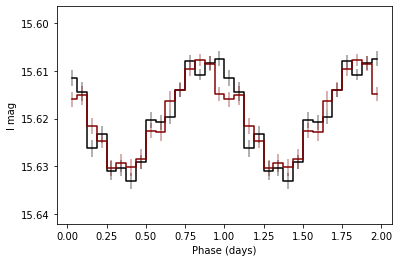

In [162]:
o.phasestep(iband,1.239001,16,divide=True)
o.phasestep(iband,5.184,16,divide=True,color='maroon')

5.18 and 1.239001 are aliases

In [ ]:
qnums = [8,42,61,68,69,71,76,77,78,79,81,93,98,100,105,111,114,129,138,139,141]
#took out 111,8,42, which have gradual changes and periodicity
#141 also maybe has both
#hard to tell gradual variability b/c of V band, so plot all LCs with just I

flag for this kind of source in summ and phase

In [193]:
# summ['aperiodic quiescence'] = 'NO'
# phase['aperiodic quiescence'] = 'NO'

# for q in qnums[:-1]: #exclusing 141
#     row = summ[summ['src_n']==q]
#     rowp = phase[phase['src_n']==q]
#     row['aperiodic quiescence'] = 'YES'
#     rowp['aperiodic quiescence'] = 'YES'
#     summ[summ['src_n']==q] = row
#     phase[phase['src_n']==q] = rowp

In [194]:
phase[5:10]

src_n     period       amp  phase diff  phase max  phase min     shape  \
5      6  17.347929  0.010919      0.5625    0.71875    0.15625      FRED   
6      7  23.961722  0.009435      0.5625    0.34375    0.78125  not FRED   
7      8   6.228457  0.007581      0.5625    0.65625    0.09375      FRED   
8      9  44.901697  0.038127      0.5625    0.65625    0.09375      FRED   
9     10  39.834982  0.024650      0.6000    0.45000    0.85000  not FRED   

   diff mean       mean      skew  kurtosis  symm sum  mean err  \
5   0.006299  15.903686  0.276520 -1.129137  0.005594  0.001599   
6   0.003832  14.718428 -0.231566 -0.779174  0.003239  0.002081   
7   0.003651  16.443051 -0.151327 -0.223014  0.001190  0.001226   
8   0.012423  14.762703 -0.908259 -0.250843  0.006697  0.001979   
9   0.012984  15.860966  0.083242 -0.202326  0.007678  0.001150   

  aperiodic quiescence  
5                   NO  
6                   NO  
7                  YES  
8                   NO  
9                   NO

In [195]:
phase.to_csv('phasetab.csv',index=False)
summ.to_csv('summtab.csv',index=False)

## quiescent sources in part 1
- may not be quiescent (may be in gradual change category) but analyze here and try to distinguish with parameters

In [ ]:
qn1 = [47,58,59,64,54] #47 may wind up with "gradual variability"
#58 has est. period of 412

see ATel 12236 for #47
- they say past period of 520 not confirmed by Bird and incompatible with two outbursts separated by ~600 days
- no mention of 344

established period: 344.0


src_n    ra_deg   dec_deg  spin period  perr  est. period       sep name  \
42     47  15.26147 -72.11614        304.5   1.2        344.0  0.830084  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
42  15.558879  0.020405  ...          NaN   NaN -0.128624   -1.012096   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
42 -0.989075    0.274005         353.61992   1.0  0.036                    NO  

[1 rows x 46 columns]

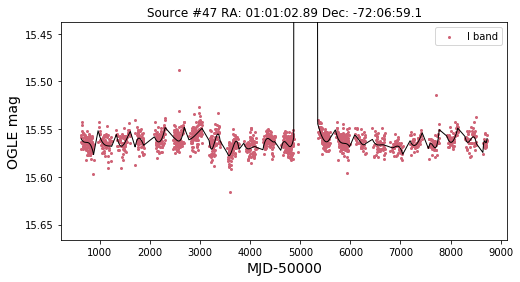

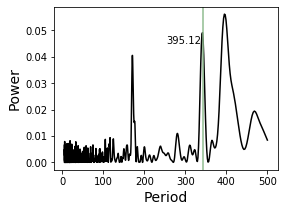

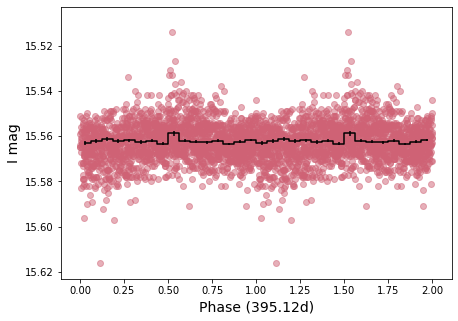

In [252]:
iband,bp = o.splinesearch(47,cross,full,maxp=500,calib=True,det=False,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==47]

<Quantity 364.86026582>

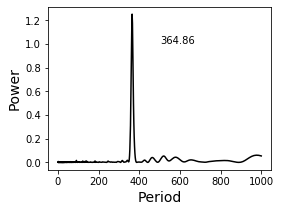

In [259]:
#window function
o.periodogram(iband,minp=2,maxp=1000,wfunc=True)

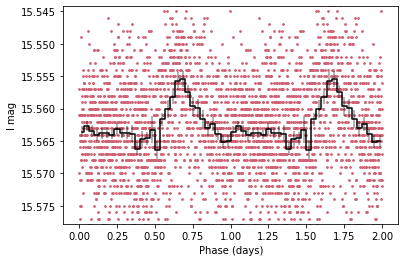

In [256]:
#use established period -- wary of this since close to year sampling
pd = 344
o.phasestep(iband,pd,30,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)

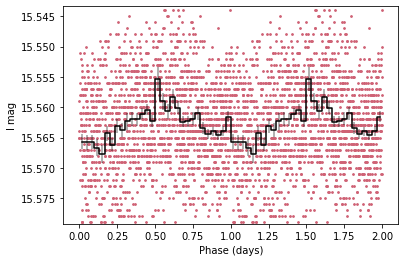

In [257]:
pd = 395.12
o.phasestep(iband,pd,30,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)

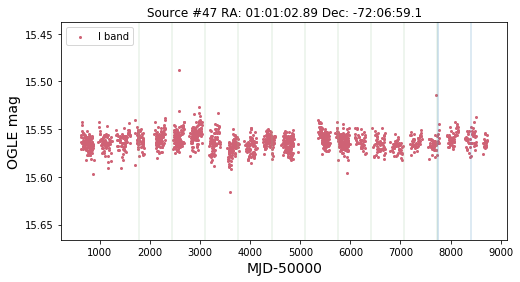

In [272]:
iband = o.getIV(47,cross,full,both=False,stack=True,plot=True,calib=True)
plt.axvspan(7736.97,7764.57,alpha=0.2) #ATel #12236
plt.axvline(8407.54,alpha=0.2)
for i in range(10):
    plt.axvline(7736.97-662*i,alpha=0.2,color='darkseagreen')#difference between outbursts

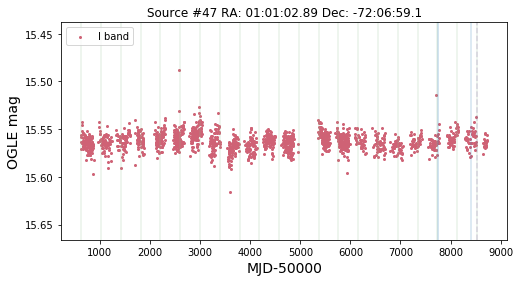

In [296]:
iband = o.getIV(47,cross,full,both=False,stack=True,plot=True,calib=True)
plt.axvspan(7736.97,7764.57,alpha=0.2) #ATel #12236
plt.axvline(8407.54,alpha=0.2)
plt.axvline(7736.97+790,alpha=0.2,color='rebeccapurple',ls='dashed')
for i in range(-2,20):
    plt.axvline(7736.97-395*i,alpha=0.2,color='darkseagreen')

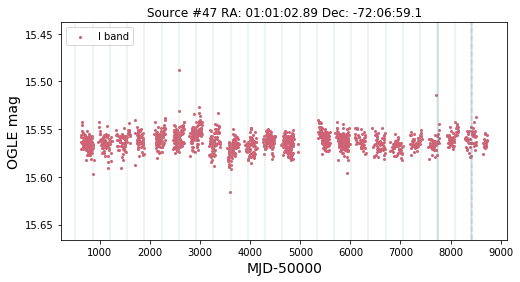

In [298]:
#344 still possible; consistent with X-ray peaks
iband = o.getIV(47,cross,full,both=False,stack=True,plot=True,calib=True)
plt.axvspan(7736.97,7764.57,alpha=0.2) #ATel #12236
plt.axvline(8407.54,alpha=0.2)
plt.axvline(7736.97+688,alpha=0.2,color='rebeccapurple',ls='dashed')
for i in range(-2,22):
    plt.axvline(7736.97-344*i,alpha=0.2,color='darkseagreen')

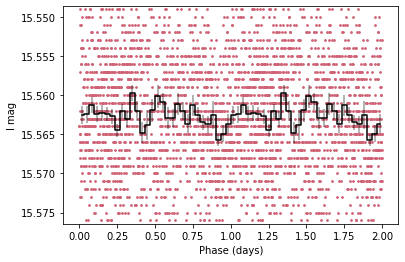

In [269]:
pd = 662 #connected to 344?
o.phasestep(iband,pd,30,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)

In [288]:
395*2

790

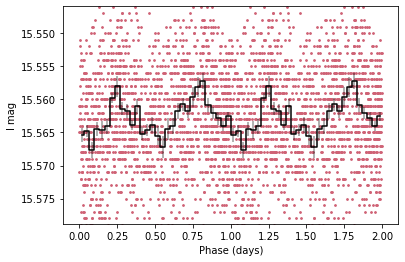

In [289]:
pd = 790 
o.phasestep(iband,pd,30,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)

#### 395 looks the best with spaced lines
- not sure where established period is from. it's decent but dangerously close to the sampling
- 662d period from separation between outbursts not great
- 395 consistent with outbursts (or peaks near outbursts) through 395*2
- 790 not better than 395 --> clearly double-peaked
- follow up this source using Swift

In [291]:
# row = summ[summ['src_n']==47]
# row['best period'] = 395
# row['name'] = 'SXP 304'
# summ[summ['src_n']==47] = row

In [294]:
# summ.to_csv('summtab.csv',index=False)

established period: 412.0


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
53     58  13.826359 -72.64776        701.6  0.53        412.0  0.723621  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
53  15.704044  0.026894  ...          NaN   NaN  0.318504   -0.127177   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
53  0.203565    0.210312         411.76121   1.0  0.038                    NO  

[1 rows x 46 columns]

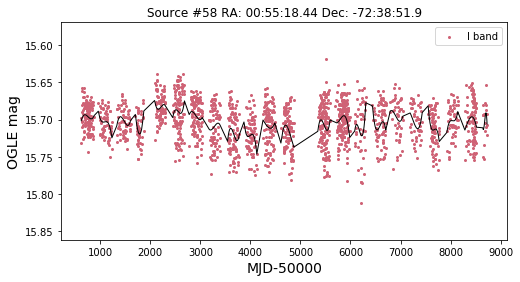

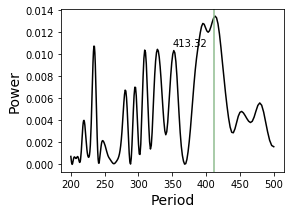

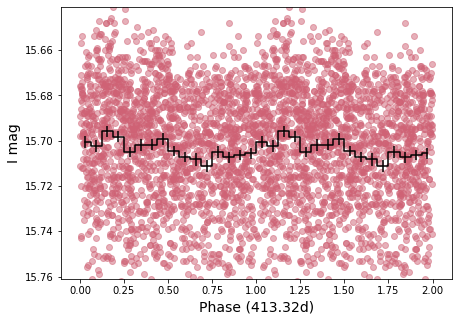

In [310]:
iband,bp = o.splinesearch(58,cross,full,minp=200,maxp=500,calib=True,det=False,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==58]

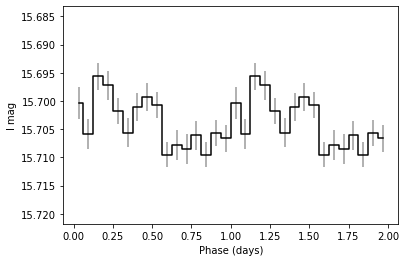

In [304]:
o.phasestep(iband,412,16,divide=True) #established

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period      sep name  \
54     59  16.480871 -72.06368        726.0  0.52          0.0  1.68147  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
54  15.471582  0.023779  ...          NaN   NaN -0.037579    0.202599   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
54  0.226011   -0.693383          3.262379   1.0  0.032                    NO  

[1 rows x 46 columns]

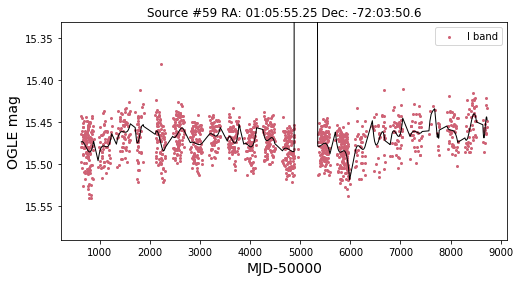

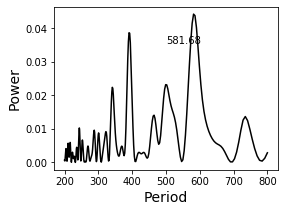

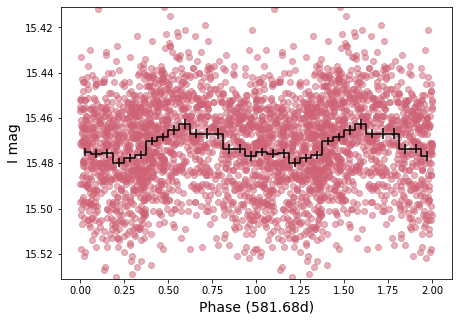

In [312]:
iband,bp = o.splinesearch(59,cross,full,minp=200,maxp=800,calib=True,det=False,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==59]

195


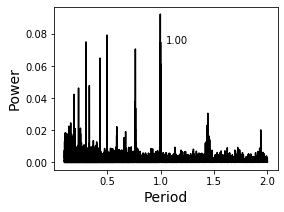

In [314]:
freq,power,bp = o.periodogram(iband,minp=0.1,maxp=2,more=True)
pf = o.findpeaks(freq,power,sigma=50,pkorder=True)
print(len(pf))

In [316]:
alias = o.aliasarr(pf['period'])
alias[alias>200] #a couple days from peak

array([ 391.59539668,  341.99325964, 5457.42722773, 5343.54893572,
        579.21370677,  977.74634801,  465.93105343, 1010.48135841,
       1717.58892789, 1693.04314737,  300.16958563,  224.47040525,
        268.34687205,  577.90657411])

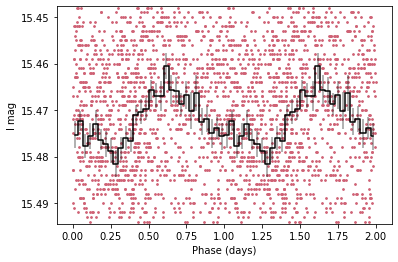

In [331]:
pd = 579.2 
o.phasestep(iband,pd,30,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,s=3)

established period: nan


src_n     ra_deg  dec_deg  spin period  perr  est. period       sep name  \
59     64  15.906292 -72.0258       1323.0   1.1          0.0  0.387539  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
59  14.557341  0.029844  ...          NaN   NaN  0.078377   -0.114025   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
59  0.056166   -0.623509         26.170771   1.0  0.039                    NO  

[1 rows x 46 columns]

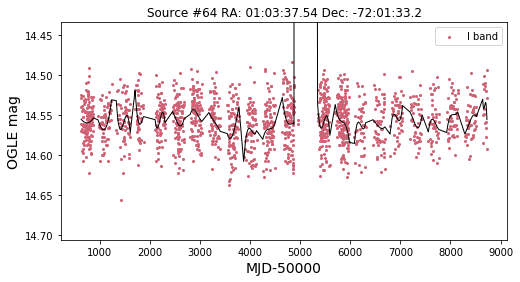

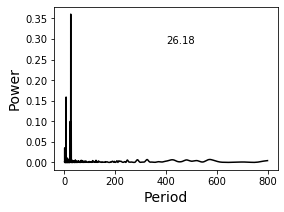

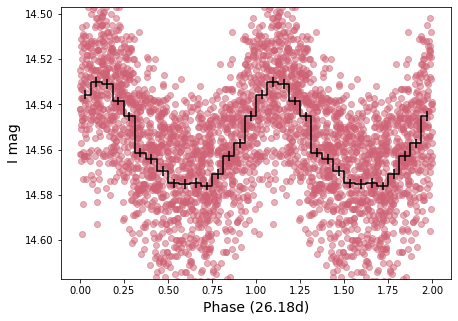

In [333]:
iband,bp = o.splinesearch(64,cross,full,minp=2,maxp=800,calib=True,det=False,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==64]

established period: 265.3


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
49     54  13.733069 -72.75302        499.2  0.51        265.3  0.453019  NaN   

      mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
49  14.76675  0.033795  ...          NaN   NaN  0.104924   -0.744588   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
49 -0.607571   -0.112791        271.317163   1.0  0.049                    NO  

[1 rows x 46 columns]

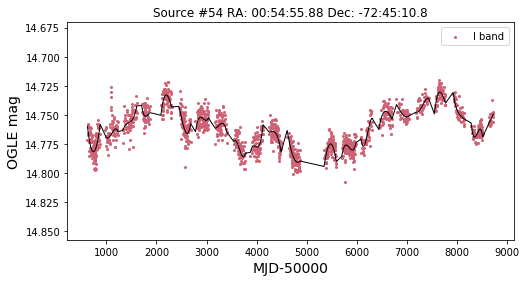

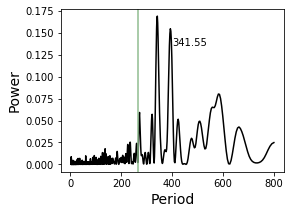

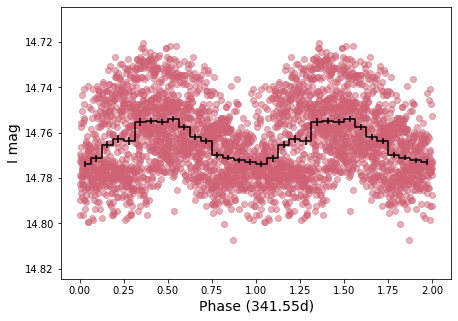

In [336]:
iband,bp = o.splinesearch(54,cross,full,minp=2,maxp=800,calib=True,det=False,window=700,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==54]

<Quantity 272.33211057>

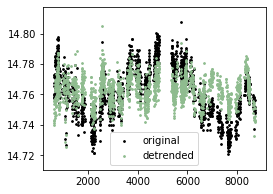

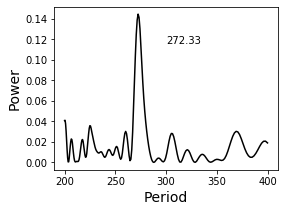

In [350]:
o.detrend(iband,window=201,plot=True)
o.periodogram(iband,det=True,minp=200,maxp=400)

recover known period approximately once detrended (Savitzky-Golay)
- same recovered in auto analysis

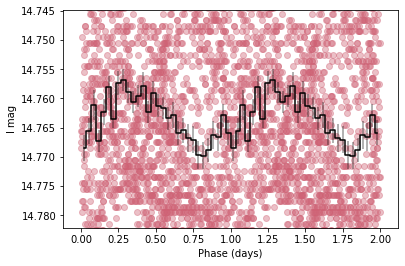

In [351]:
pd = 268.6
o.phasestep(iband,pd,30,divide=True) #period listed as established not good but 268 from optical and X-ray ATel #426
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)

# List of Sources with Gradual/Slight Variation: 
- 25,26,101,28,36,38,45,65,56,85,95,133,106,54
- added from part 2 above: 8,41,141
- possible additions from part 1: 59
- instead of deciding, find metrics that separate them in parameter space

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
34     38  15.467725 -72.39261        175.4  0.52          0.0  0.736404  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
34  14.790084  0.040051  ...          NaN   NaN  0.534988   -0.769642   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
34  5.189347   48.099316         87.320232   1.0  0.057                    NO  

[1 rows x 46 columns]

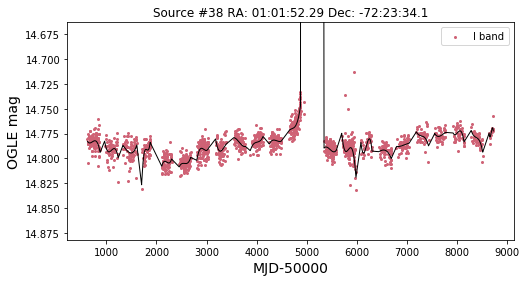

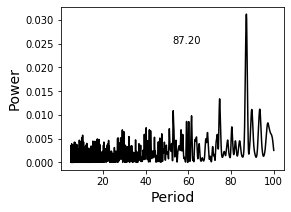

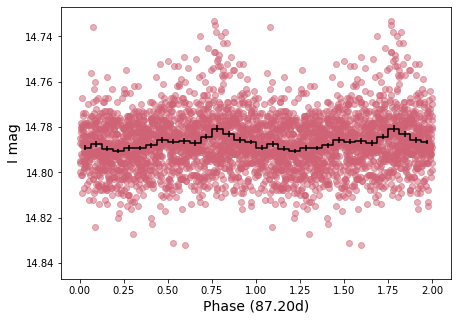

In [409]:
iband,bp = o.splinesearch(38,cross,full,maxp=100,calib=True,det=False,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==38]

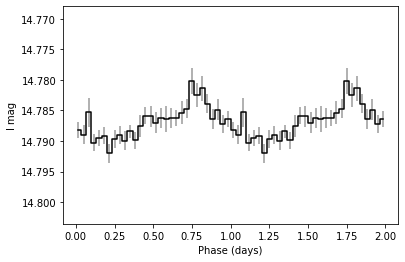

In [207]:
o.phasestep(iband,87.2,30,divide=True)

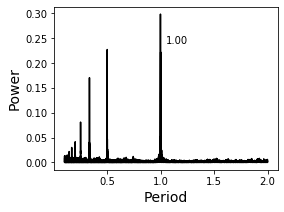

In [210]:
freq,power,bp = o.periodogram(iband,minp=0.1,maxp=2,more=True)
pf = o.findpeaks(freq,power,sigma=50,pkorder=True)

In [214]:
alias = o.aliasarr(pf['period'])
alias[alias>80] #alias of 87.1

array([ 402.1617818 , 3760.05474559,  334.18364935, 3965.29144266,
       1433.20180205,  489.61048793,  293.0991456 ,  798.15439469,
       1545.68341466,  191.37615943,  696.13038755,  114.7424314 ,
        192.33694071,  416.87928797,  251.39051073,  173.73810239,
        137.95897255,   87.1078352 ,  222.34845055,  101.88935865,
        492.93267478,   87.30634274,  125.17627258,  148.85264579,
         94.09672943,  115.87158718])

In [244]:
alias = o.aliasarr(pf['period'][100:110])
alias[alias>80]

array([137.95897255,  87.1078352 ])

In [248]:
pf[109:110]['period']

109    0.98865
Name: period, dtype: float64

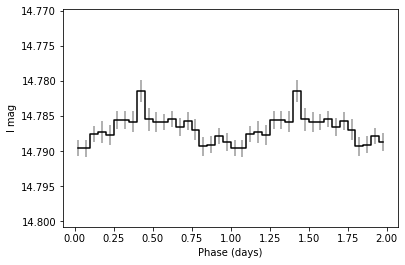

In [249]:
o.phasestep(iband,.98865,20,divide=True)

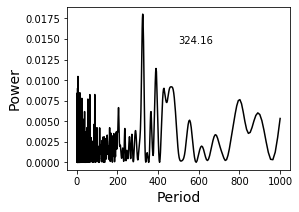

In [408]:
freq,power,bp = o.periodogram(iband,minp=2,maxp=1000,more=True)


empty file for OIII I
established period: 110.6


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
23     25  16.802626 -72.59272        65.78  0.87        110.6  0.295919  NaN   

       mean I   stdev I  ...  Type II amp  note   I skew  I kurtosis  \
23  15.891999  0.111263  ...          NaN   NaN -0.09087   -0.809076   

      V skew  V kurtosis  best auto det pd  Part    I IQR  \
23 -0.623311   -1.273501        110.846115   1.0  0.22725   

    aperiodic quiescence  
23                    NO  

[1 rows x 46 columns]

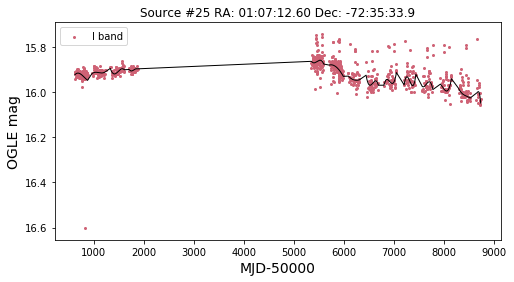

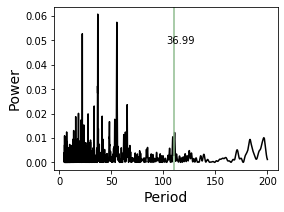

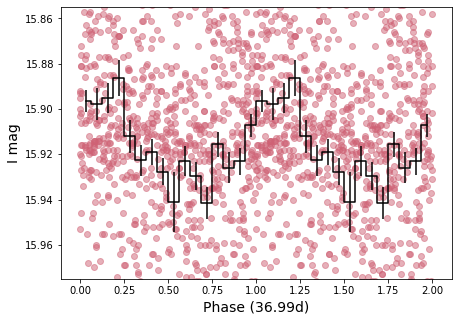

In [411]:
iband,bp = o.splinesearch(25,cross,full,maxp=200,calib=True,det=False,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==25]

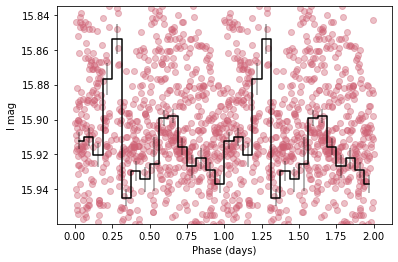

In [436]:
#est. period
pd = 110.6
o.phasestep(iband,pd,16,divide=True)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)

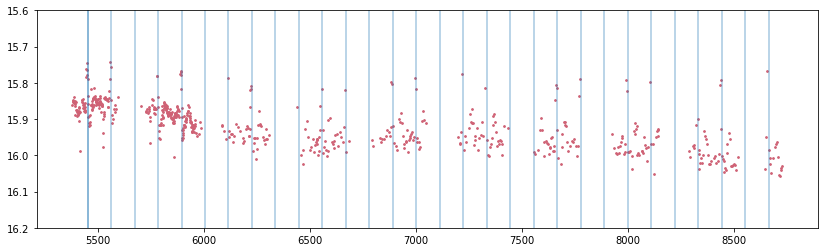

In [438]:
plt.figure(figsize=(14,4))
plt.scatter(iband['MJD-50000'][300:],iband['I mag'][300:],color=pink,s=3)
plt.ylim(16.2,15.6)
plt.axvline(5450,alpha=0.4)
for i in range(30):
    plt.axvline(5450+110.8*i,alpha=0.4) #can't distinguish between 110.8 and 110.6
    
# for i in range(30):
#     plt.axvline(5415+110.6*i,alpha=0.4,color='darkseagreen',ls='dashed')
# for i in range(30):
#     plt.axvline(5470+110.6*i,alpha=0.4,color='rebeccapurple',ls='dotted')

established period: 33.38


src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
24     26  12.263891 -72.847824        74.67  0.62        33.38  0.181334   

   name     mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
24  NaN  16.696078  0.048745  ...          NaN   NaN  0.851739    0.250392   

      V skew  V kurtosis  best auto det pd  Part I IQR  aperiodic quiescence  
24  1.418296    2.869675         33.406866   1.0  0.06                    NO  

[1 rows x 46 columns]

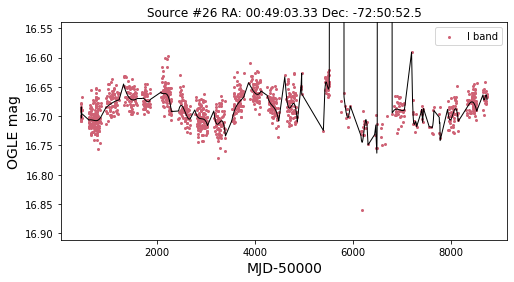

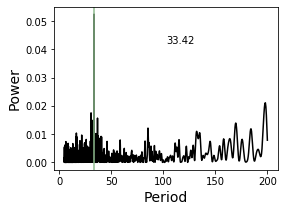

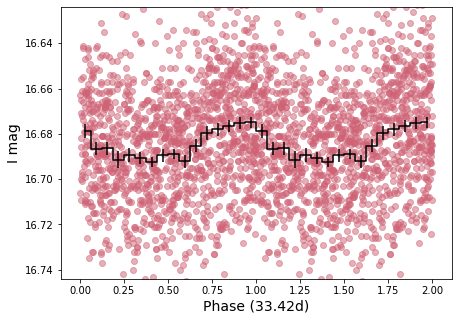

In [439]:
iband,bp = o.splinesearch(26,cross,full,maxp=200,calib=True,det=False,both=False,mlist=mlist1,color=pink)
summ[summ['src_n']==26]

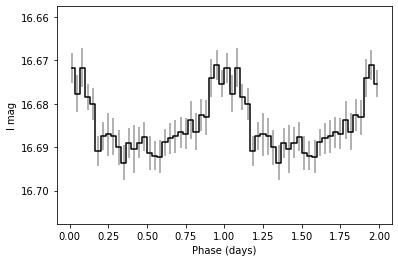

In [443]:
#established
o.phasestep(iband,33.38,30,divide=True)

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
85    101  13.371667 -72.56333          0.0  2.71          0.0  0.675025  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
85  14.535422  0.027346  ...          NaN   NaN  0.517375   -0.153883   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
85 -3.141739   10.160684         35.424239   2.0  0.039                    NO  

[1 rows x 46 columns]

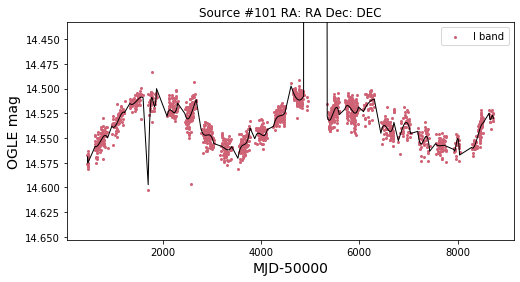

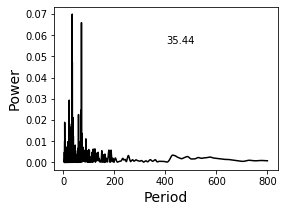

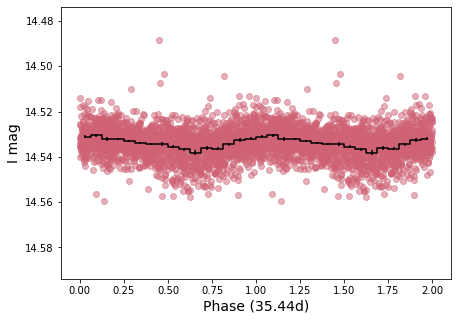

In [463]:
iband,bp = o.splinesearch(101,cross2,full,maxp=800,calib=True,det=True,both=False,mlist=mlist2,color=pink,window=700)
summ[summ['src_n']==101]

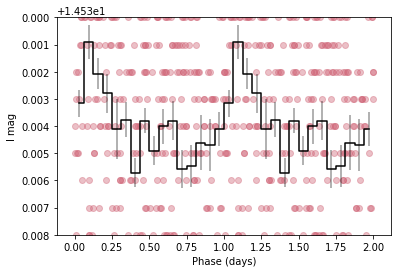

In [467]:
pd = 35.6 #example of changing slightly for FRED shape
o.phasestep(iband,pd,16,divide=True,det=True)
plt.ylim(14.538,14.53)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)

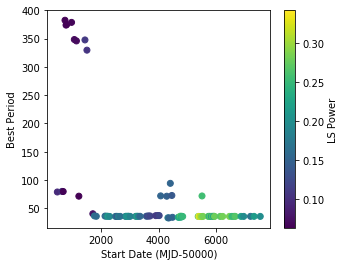

In [468]:
roll = o.rollpd(iband,maxp=800,det=True)

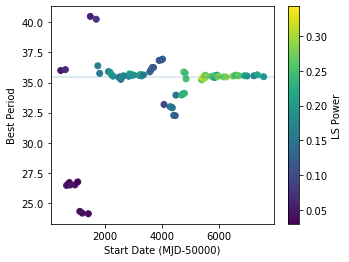

In [470]:
#relatively very stable
roll = o.rollpd(iband,minp=20,maxp=50,det=True)
plt.axhline(35.44,alpha=0.2)

established period: 88.3


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
26     28  12.737854 -72.22597        91.12  0.52         88.3  0.917587  NaN   

       mean I   stdev I  ...  Type II amp  note   I skew  I kurtosis  \
26  14.766838  0.025599  ...          NaN   NaN -0.27552    0.829795   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
26  0.122908   -1.123066         88.343536   1.0  0.036                    NO  

[1 rows x 46 columns]

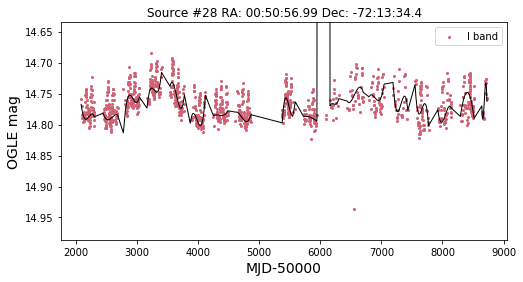

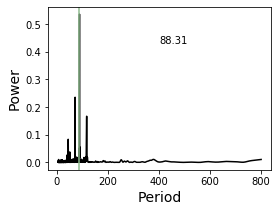

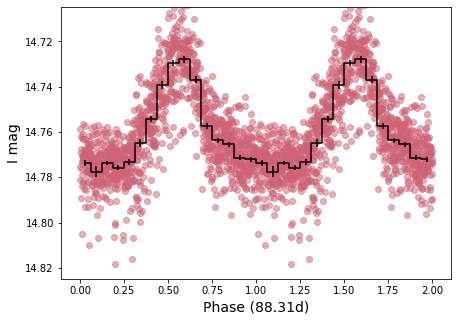

In [478]:
iband,bp = o.splinesearch(28,cross,full,maxp=800,calib=True,det=True,both=False,mlist=mlist1,color=pink,window=700)
summ[summ['src_n']==28]

established period: 68.54


src_n     ra_deg   dec_deg  spin period  perr  est. period  sep name  \
32     36  13.229781 -71.96826        169.3  0.51        68.54  0.0  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
32  15.375166  0.034089  ...          NaN   NaN  0.083046    -0.55959   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
32  0.657991    1.189636         68.616612   1.0  0.049                    NO  

[1 rows x 46 columns]

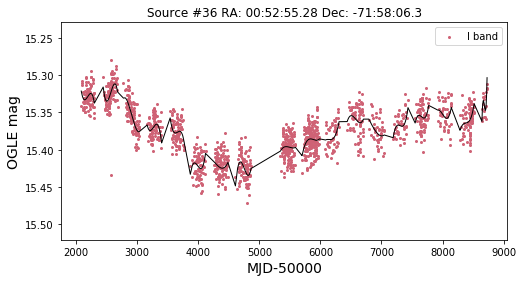

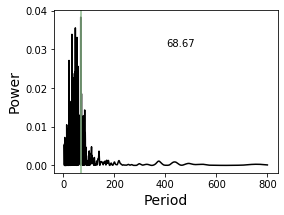

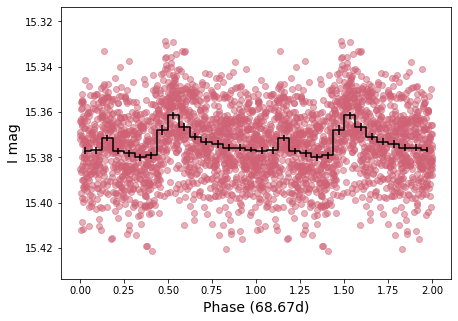

In [479]:
iband,bp = o.splinesearch(36,cross,full,maxp=800,calib=True,det=True,both=False,mlist=mlist1,color=pink,window=700)
summ[summ['src_n']==36]

established period: 59.77


src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
40     45  14.553074 -72.513435       291.33  0.52        59.77  0.417097   

   name   mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
40  NaN  14.5494  0.046834  ...          NaN   NaN  0.251503   -0.307464   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
40 -0.125948   -0.692345         59.711001   1.0  0.062                    NO  

[1 rows x 46 columns]

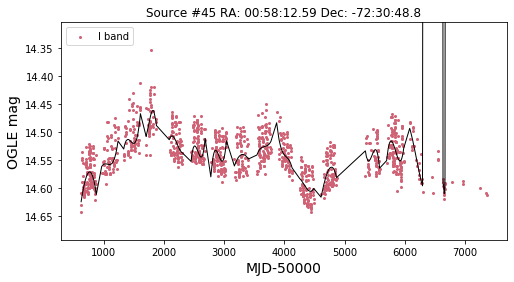

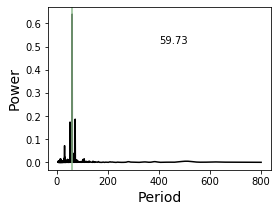

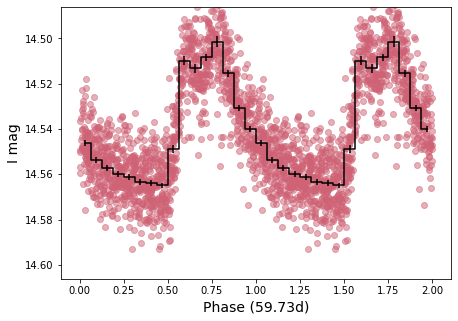

In [481]:
iband,bp = o.splinesearch(45,cross,full,maxp=800,calib=True,det=True,both=False,mlist=mlist1,color=pink,window=700)
summ[summ['src_n']==45]

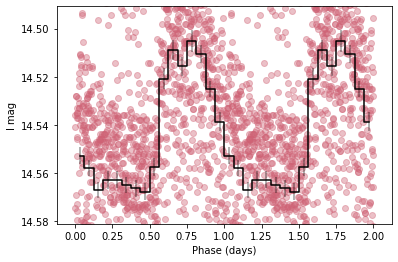

In [485]:
pd = 59.711001
o.phasestep(iband,pd,16,divide=True) #auto best det pd not as good! but just uncertainty from detrending (see how it look sbetter in notebook)
plt.scatter((iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)
plt.scatter(1+(iband['MJD-50000']%pd)/pd,iband['I mag'],color=pink,alpha=0.4)

established period: nan


src_n     ra_deg   dec_deg  spin period  perr  est. period    sep name  \
60     65  13.692583 -72.42306       4693.0   1.0          0.0  1.035  NaN   

       mean I   stdev I  ...  Type II amp  note   I skew  I kurtosis   V skew  \
60  15.366245  0.029556  ...          NaN   NaN -0.14394   -0.905905 -7.88403   

    V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
60    67.15034          2.688972   1.0  0.046                    NO  

[1 rows x 46 columns]

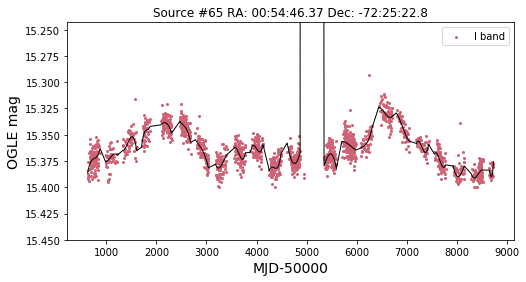

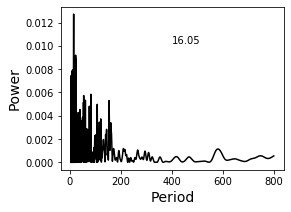

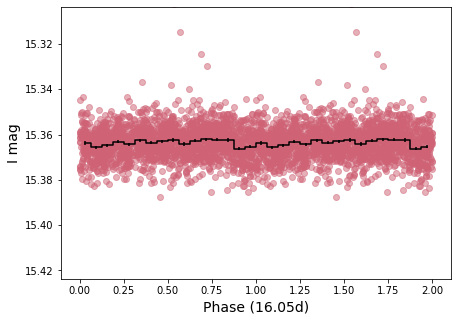

In [488]:
iband,bp = o.splinesearch(65,cross,full,maxp=800,calib=True,det=True,both=False,mlist=mlist1,color=pink,window=700)
summ[summ['src_n']==65] #2.7 also an NRP detected in ATel #7831

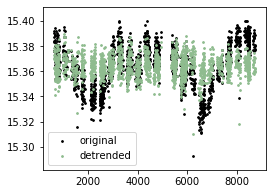

In [490]:
o.detrend(iband,plot=True,window=101)

<Quantity 207.17323097>

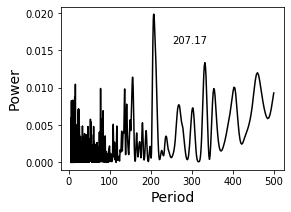

In [493]:
o.periodogram(iband,det=True,maxp=500)

(15.37, 15.36)

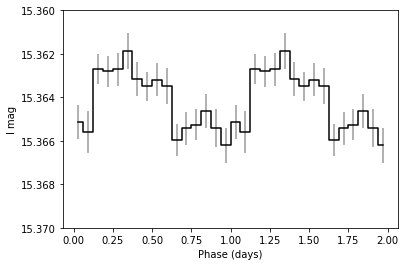

In [497]:
o.phasestep(iband,207.17,16,det=True,divide=True)
plt.ylim(15.37,15.36)

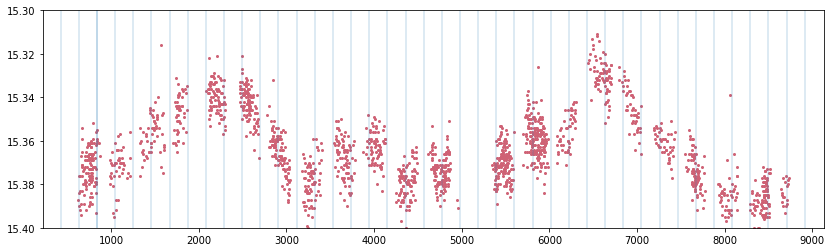

In [510]:
plt.figure(figsize=(14,4))
plt.scatter(iband['MJD-50000'],iband['I mag'],color=pink,s=4)
plt.ylim(15.4,15.3)
plt.axvline(840,alpha=0.2)
for i in range(-2,40):
    plt.axvline(840+207*i,alpha=0.2)
#not a great match

<Quantity 2.68905775>

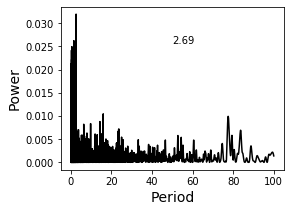

In [511]:
o.periodogram(iband,det=True,minp=0.1,maxp=100)

(15.37, 15.36)

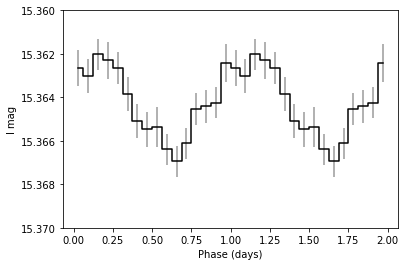

In [514]:
o.phasestep(iband,2.6890578,16,det=True,divide=True)
plt.ylim(15.37,15.36)

established period: 151.0


src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
51     56  14.400833 -72.32611        565.0   0.7        151.0  0.667688  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
51  15.798923  0.025057  ...          NaN   NaN  0.054376    0.605789   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
51 -0.013256   -0.145211        153.506823   1.0  0.036                    NO  

[1 rows x 46 columns]

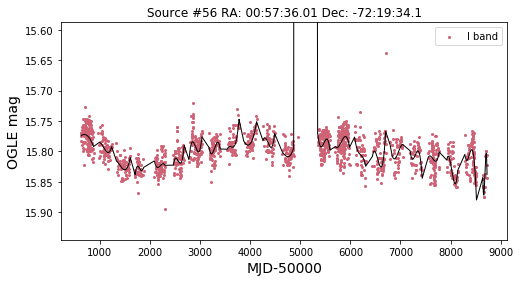

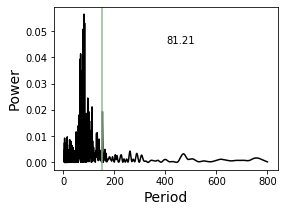

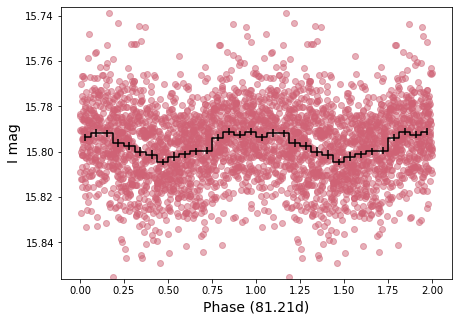

In [518]:
iband,bp = o.splinesearch(56,cross,full,maxp=800,calib=True,det=True,both=False,mlist=mlist1,color=pink,window=700)
summ[summ['src_n']==56]

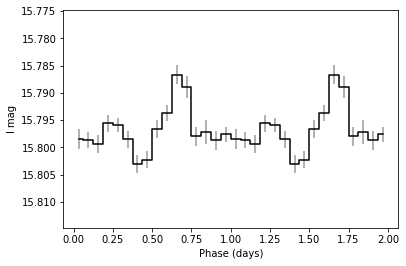

In [531]:
o.phasestep(iband,152.8,16,divide=True,det=True) #151 day established not working well (should really be 151.8? 2 day error)

established period: nan


src_n     ra_deg    dec_deg  spin period  perr  est. period      sep name  \
76     85  12.738696 -73.168884          0.0  0.51          0.0  0.50871  NaN   

       mean I  stdev I  ...  Type II amp  note    I skew  I kurtosis  \
76  14.377126  0.02206  ...          NaN   NaN -0.298832   -0.728651   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
76  0.912439    1.997879        117.336576   2.0  0.033                    NO  

[1 rows x 46 columns]

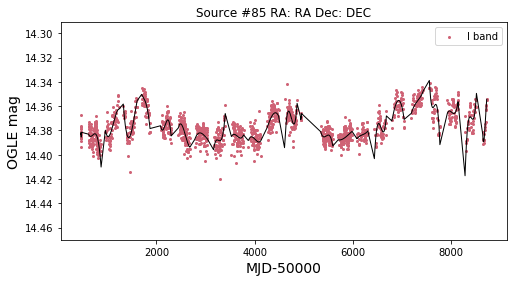

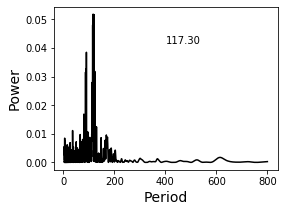

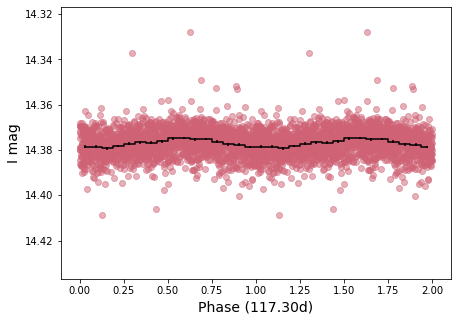

In [537]:
iband,bp = o.splinesearch(85,cross2,full,maxp=800,calib=True,det=True,both=False,mlist=mlist2,color=pink,window=700)
summ[summ['src_n']==85]

<Quantity 117.44112138>

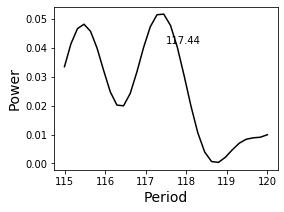

In [538]:
#zoom in on signal
o.periodogram(iband,minp=115,maxp=120,det=True)

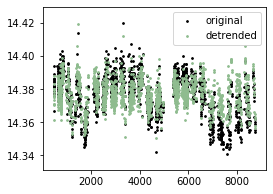

In [539]:
#S-G detrending
o.detrend(iband,window=201,plot=True)

<Quantity 115.46423738>

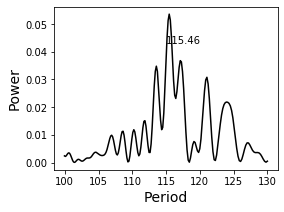

In [543]:
o.periodogram(iband,minp=100,maxp=130,det=True)

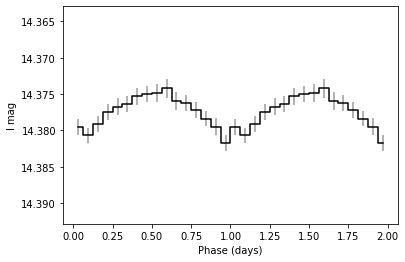

In [548]:
pd = 115.46424
o.phasestep(iband,pd,16,divide=True)

established period: nan


src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
80     95  13.155417 -72.458885          0.0  1.19          0.0  0.521355   

   name     mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
80  NaN  14.821148  0.039045  ...          NaN   NaN  0.006777   -1.471278   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
80 -0.423256   -0.460517         78.307933   2.0  0.077                    NO  

[1 rows x 46 columns]

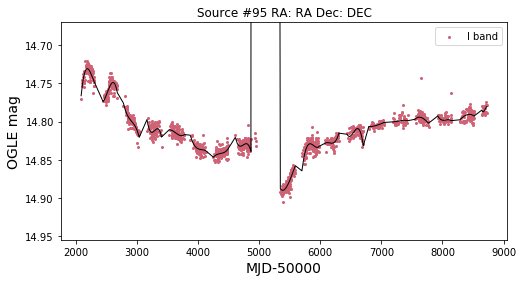

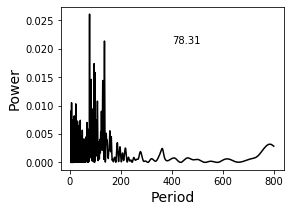

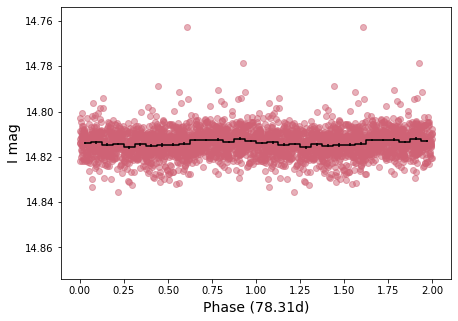

In [549]:
iband,bp = o.splinesearch(95,cross2,full,maxp=800,calib=True,det=True,both=False,mlist=mlist2,color=pink,window=700)
summ[summ['src_n']==95]

established period: nan


src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
103    133  16.147781 -72.363106          0.0  0.76          0.0  1.225616   

    name     mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
103  NaN  15.002412  0.028799  ...          NaN   NaN  0.281915   -0.141823   

       V skew  V kurtosis  best auto det pd  Part    I IQR  \
103  0.704485    0.974512          4.063649   2.0  0.04075   

     aperiodic quiescence  
103                    NO  

[1 rows x 46 columns]

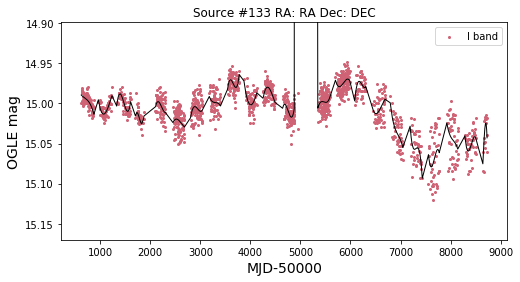

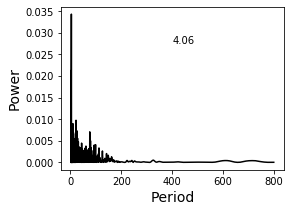

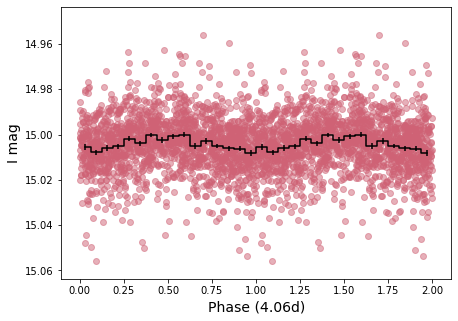

In [553]:
iband,bp = o.splinesearch(133,cross2,full,minp=2,maxp=800,calib=True,det=True,both=False,mlist=mlist2,color=pink,window=700)
summ[summ['src_n']==133]

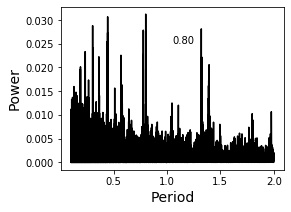

In [554]:
f,p,bp = o.periodogram(iband,minp=0.1,maxp=2,det=True,more=True)
pf = o.findpeaks(f,p,sigma=50,pkorder=True)

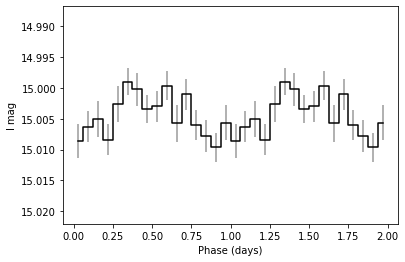

In [566]:
o.phasestep(iband,4.06379158,16,divide=True) #alias with 4.06 days

In [564]:
alias = o.aliasarr(pf['period'][12:13])
alias[alias>2]

array([4.06379158])

established period: nan


src_n    ra_deg   dec_deg  spin period  perr  est. period  sep name  \
88    106  13.53615 -72.53543          0.0  1.44          0.0  0.0  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
88  16.991391  0.043595  ...          NaN   NaN -0.018026   -1.190178   

      V skew  V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
88  1.990461    4.533271          9.379065   2.0  0.078                    NO  

[1 rows x 46 columns]

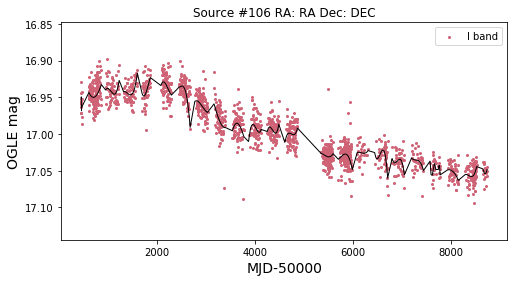

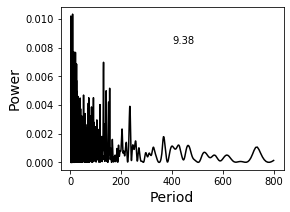

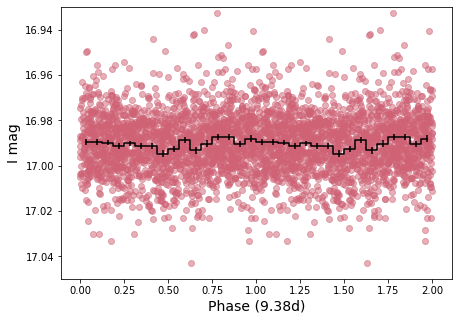

In [570]:
iband,bp = o.splinesearch(106,cross2,full,minp=2,maxp=800,calib=False,det=True,both=False,mlist=mlist2,color=pink,window=700)
summ[summ['src_n']==106]

In [ ]:
#gradual and quiescent source numbers: APPROXIMATE
#just use to help optimize parameters that would identify these
grad = [25,26,101,28,36,38,45,65,56,85,95,133,106,54,141,54,61,111,77]
qnums = [47,58,59,64,8,42,68,69,71,76,78,79,81,93,98,100,105,114,129,138,139]

In [ ]:
grows = []
for g in grad:   
    grow = summ[summ['src_n']==g]
    grow['aperiodic quiescence'] = 'NO'
    summ[summ['src_n']==g] = grow
    grows.append(grow)

In [ ]:
import pandas as pd
gsum = pd.concat(grows)

In [ ]:
#repeat for quiescent
qrows = []
for g in qnums:   
    qrow = summ[summ['src_n']==g]
    summ[summ['src_n']==g] = qrow
    qrows.append(qrow)

In [677]:
qsum = pd.concat(qrows)

next thing to try would be to compare spline stdev to original

In [696]:
#standard deviation of medians for ten segments of LC
#be careful of calibration
def med10(srcn,cut=10,retstd=True,retrange=False,calib=True,plot=True): #decide whether to do fixed chunks or fixed factor chunks or fixed number of points
    if srcn in cross['src_n']:
        c = cross
        mlist = mlist1
    else:
        c = cross2
        mlist = mlist2
    iband = o.getIV(srcn,c,calib=calib,both=False,stack=True,plot=plot,mlist=mlist,printall=False)
    imagsplit = np.array_split(iband['I mag'],cut)
    meds = []
    for i in range(cut):
        med = np.median(imagsplit[i])
        meds.append(med)
    if retstd and retrange: return np.std(meds), np.max(meds)-np.min(meds)
    elif retstd: return np.std(meds)
    elif retrange: return p.max(meds)-np.min(meds)
    else: return meds

In [697]:
qsd = []
qrange = []
for q in qnums:
    std,ran = med10(q,plot=False,retrange=True)
    qsd.append(std); qrange.append(ran)

empty file for OII I


In [699]:
gsd = []
grange = []
for q in grad:
    if q in [8,141]:calib=True
    else: calib=False
    std,ran = med10(q,plot=False,calib=calib,retrange=True)
    gsd.append(std); grange.append(ran)

empty file for OIII I


In [644]:
summ[summ['src_n']==77]

src_n     ra_deg    dec_deg  spin period  perr  est. period       sep  \
69     77  12.377575 -73.519264          0.0  0.57          0.0  1.289047   

   name     mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  \
69  NaN  19.236647  0.646089  ...          NaN   NaN  1.505199    6.201181   

      V skew  V kurtosis  best auto det pd  Part    I IQR  \
69  3.030992   12.404027          3.188164   2.0  0.34475   

    aperiodic quiescence  
69                   YES  

[1 rows x 46 columns]

(-0.01, 0.3)

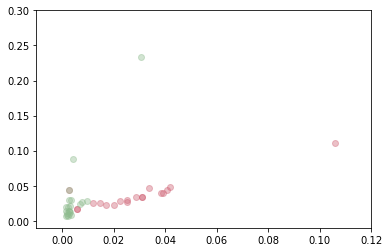

In [700]:
plt.scatter(gsd,gsum['stdev I'],color=pink,alpha=0.4)
plt.scatter(qsd,qsum['stdev I'],color='darkseagreen',alpha=0.4)
#cutting out outlier 
plt.xlim(-.01,.12)
plt.ylim(-.01,.3)

(-0.01, 0.3)

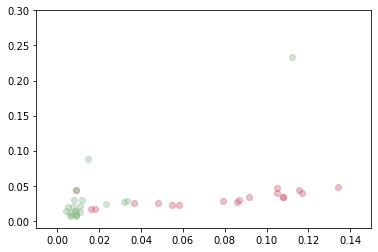

In [706]:
#similar result
plt.scatter(grange,gsum['stdev I'],color=pink,alpha=0.4)
plt.scatter(qrange,qsum['stdev I'],color='darkseagreen',alpha=0.4)
#cutting out outlier 
plt.xlim(-.01,.15)
plt.ylim(-.01,.3)

(-0.01, 4)

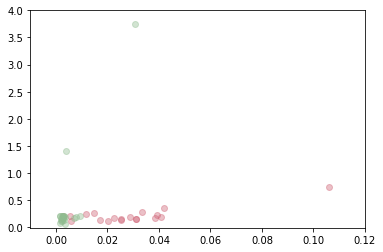

In [679]:
plt.scatter(gsd,gsum['I range'],color=pink,alpha=0.4)
plt.scatter(qsd,qsum['I range'],color='darkseagreen',alpha=0.4)
#cutting out outlier 
plt.xlim(-.01,.12)
plt.ylim(-.01,4)

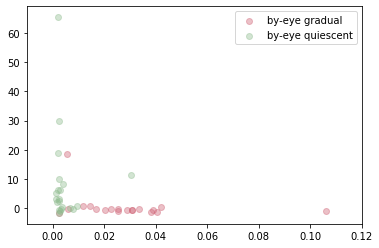

In [712]:
plt.scatter(gsd,gsum['I kurtosis'],color=pink,alpha=0.4,label='by-eye gradual')
plt.scatter(qsd,qsum['I kurtosis'],color='darkseagreen',alpha=0.4,label='by-eye quiescent')
plt.xlim(-.01,.12)
plt.legend()

Text(0, 0.5, 'I mag kurtosis')

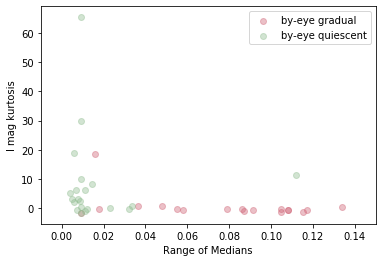

In [711]:
plt.scatter(grange,gsum['I kurtosis'],color=pink,alpha=0.4,label='by-eye gradual')
plt.scatter(qrange,qsum['I kurtosis'],color='darkseagreen',alpha=0.4,label='by-eye quiescent')
plt.xlim(-.01,.15)
plt.legend()
plt.xlabel('Range of Medians')
plt.ylabel('I mag kurtosis')

(-0.01, 0.12)

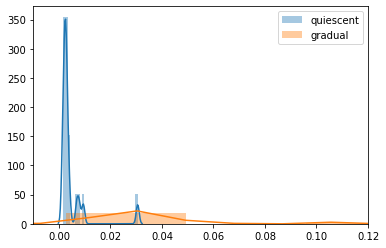

In [689]:
sb.distplot(qsd,label='quiescent')
sb.distplot(gsd,label='gradual')
plt.legend()
plt.xlim(-.01,.12)

In [583]:
summ[summ['src_n']==111]

src_n     ra_deg   dec_deg  spin period  perr  est. period       sep name  \
90    111  13.782148 -72.37787          0.0  0.89          0.0  0.773307  NaN   

       mean I   stdev I  ...  Type II amp  note    I skew  I kurtosis  V skew  \
90  14.574343  0.016476  ...          NaN   NaN -2.982028    18.67819 -0.6005   

    V kurtosis  best auto det pd  Part  I IQR  aperiodic quiescence  
90    1.413334          2.045777   2.0  0.015                   YES  

[1 rows x 46 columns]

compare quiescent/gradual source spin periods to other spin periods

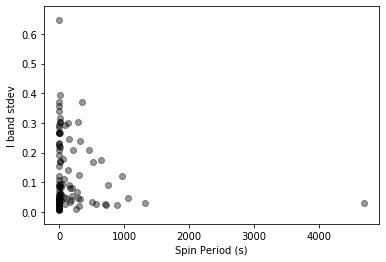

In [526]:
#as suspected, you can expect low I standard deviation for high spin periods/vice versa
plt.scatter(summ['spin period'],summ['stdev I'],color='black',alpha=0.4)
plt.xlabel('Spin Period (s)')
plt.ylabel('I band stdev')
# plt.savefig('Figs/spin_stdev.png',dpi=200,bbox_inches='tight')